# Twitter Pyspark Streaming with Visualization

In [1]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SparkSession, Row
from twitter_app import TCP_IP, TCP_PORT,KEYWORD
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import time
import string


def spark(TCP_IP,TCP_PORT,KEYWORD):
    sc=SparkContext(appName="TwitterStreammingApp")
    sc.setLogLevel("ERROR")
    ssc=StreamingContext(sc,10)
    
    data_stream = ssc.socketTextStream(TCP_IP,TCP_PORT)
    
    lines=data_stream.window(300)
    
    punc = string.punctuation
    df=lines.flatMap(lambda x: x.split(" ")).filter(lambda x: x.startswith("@"))\
            .map(lambda x: x.strip().lower()[0:-1] if x.strip()[-1] in punc else x.lower())\
            .filter(lambda x: x.lower()!='@%s'%KEYWORD.lower())  
    
    def process(rdd):
        print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
        sqlContext=SparkSession.builder \
                .config(conf=rdd.context.getConf()).getOrCreate()
        print("Here 1")
        rdd_row = rdd.map(lambda x: Row(user=x))
        usersDF = sqlContext.createDataFrame(rdd_row)
        print("Here 2")
        usersDF.createOrReplaceTempView("users")
        print("Here 3")
        userDF_count = sqlContext.sql("select user, count(user) as total from users group by user order by total desc")       
        pd_df=userDF_count.toPandas()
        print("Here 4")
        fig, ax = plt.subplots(figsize = (10, 8))
        sns.barplot(x="total", y="user", data=pd_df.head(20), ax=ax)
        print("Here 5")
        local_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
        ax.set_title('Data Obtained at {}'.format(local_time))
        print("Here 6")
        #plt.savefig('./plots/0910-09/{}.jpg'.format(str(local_time)),bbox_inches = 'tight',dpi=500)
        plt.savefig('/Users/xxx/PycharmProjects/realtime_twitter/plots/0912-18/'+local_time+'.jpg',bbox_inches = 'tight',dpi=500)
        print("Here 7")
        plt.show()
        
    df.foreachRDD(process)
    
    ssc.start()
    
    

2020-09-12 18:15:50
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


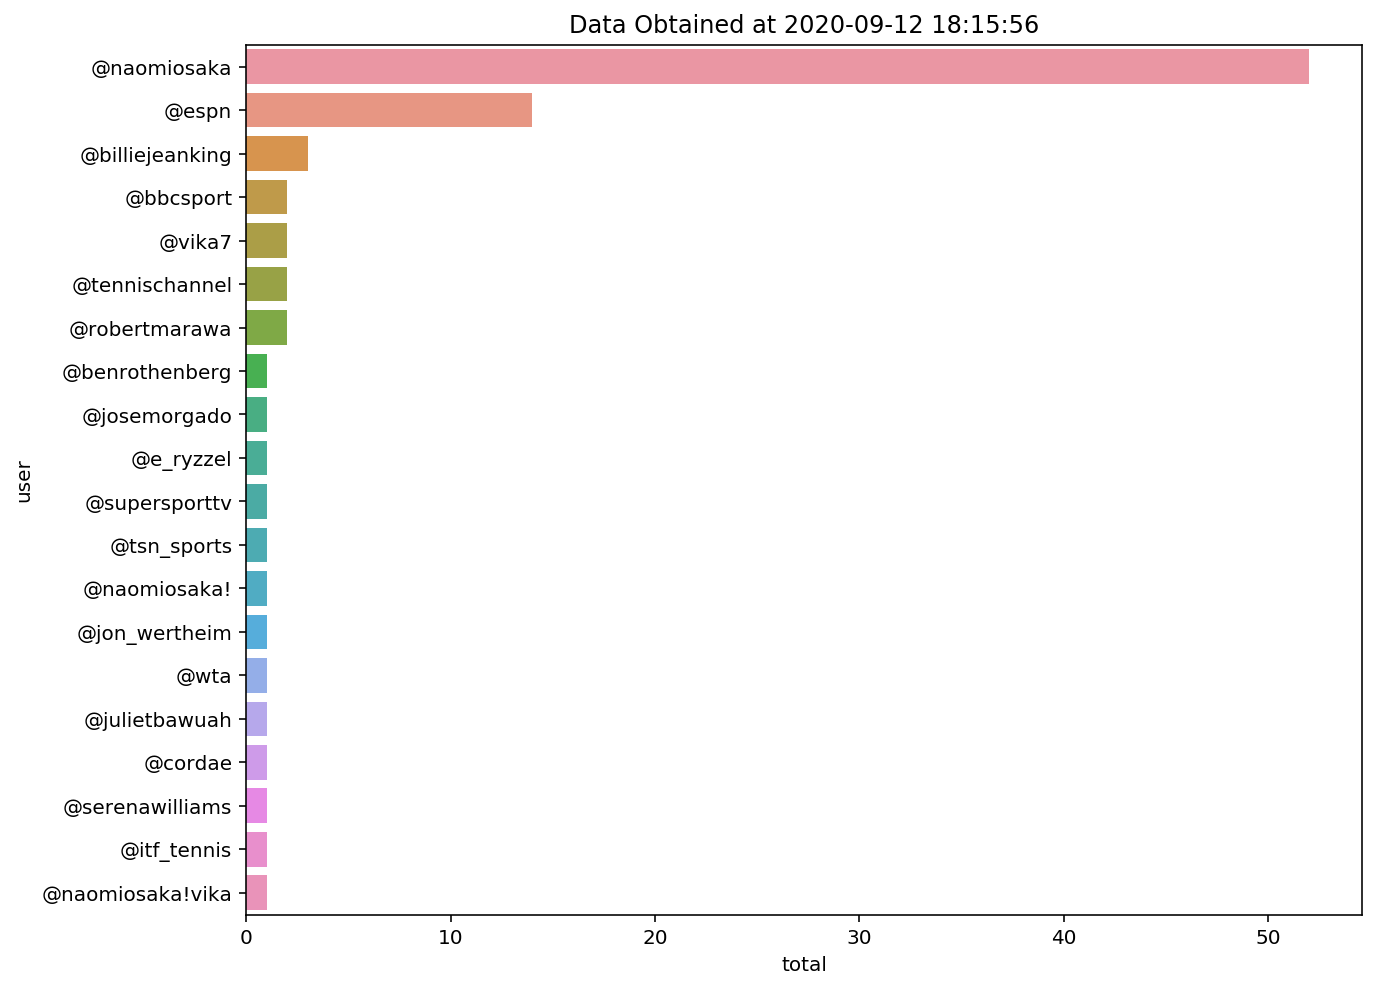

2020-09-12 18:16:00
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


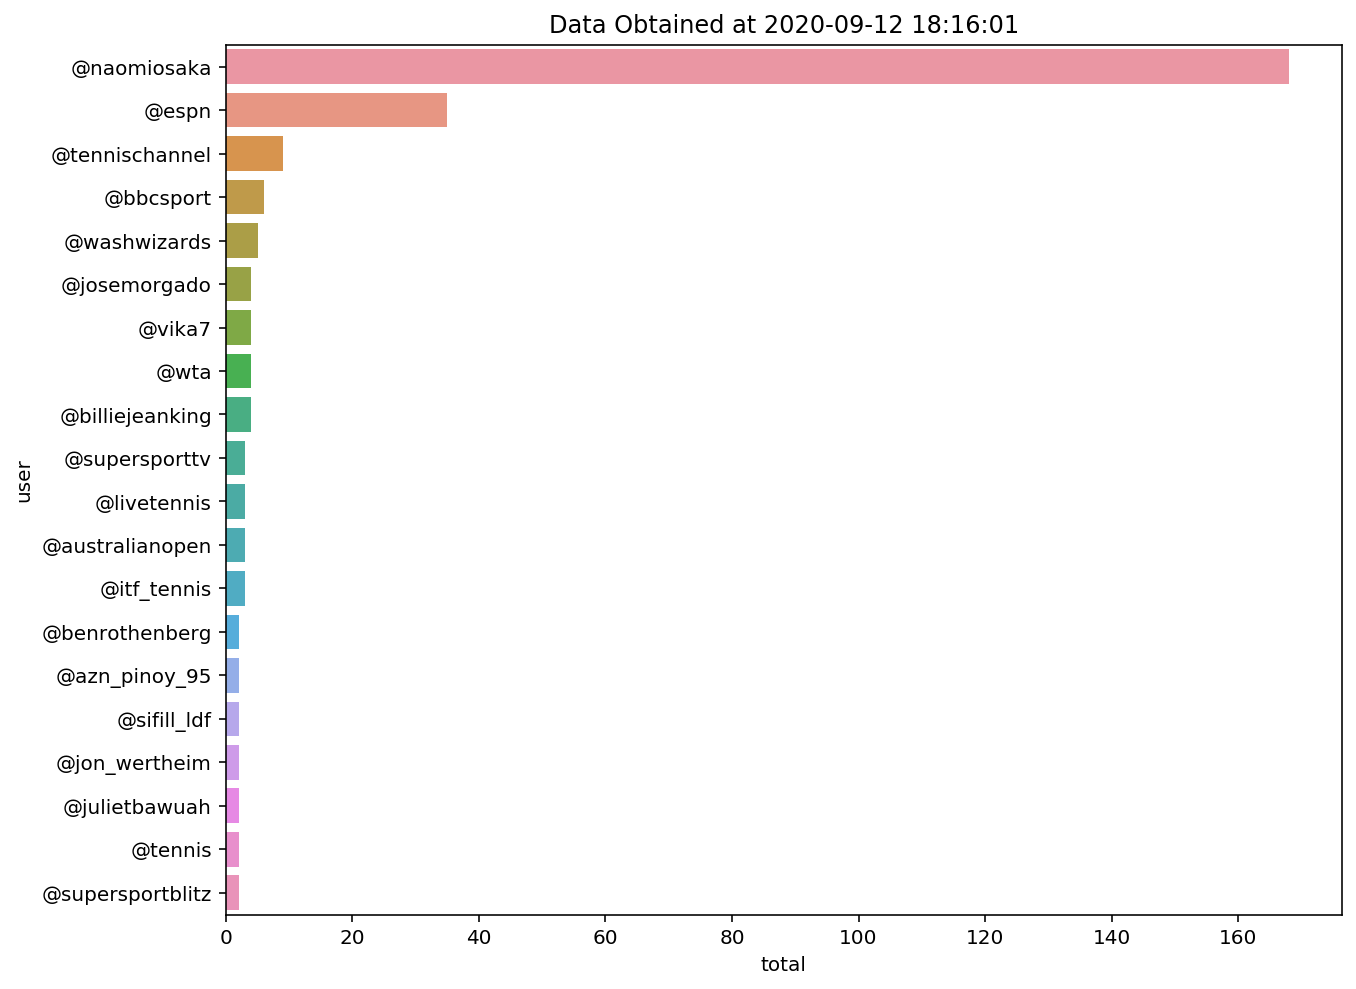

2020-09-12 18:16:10
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


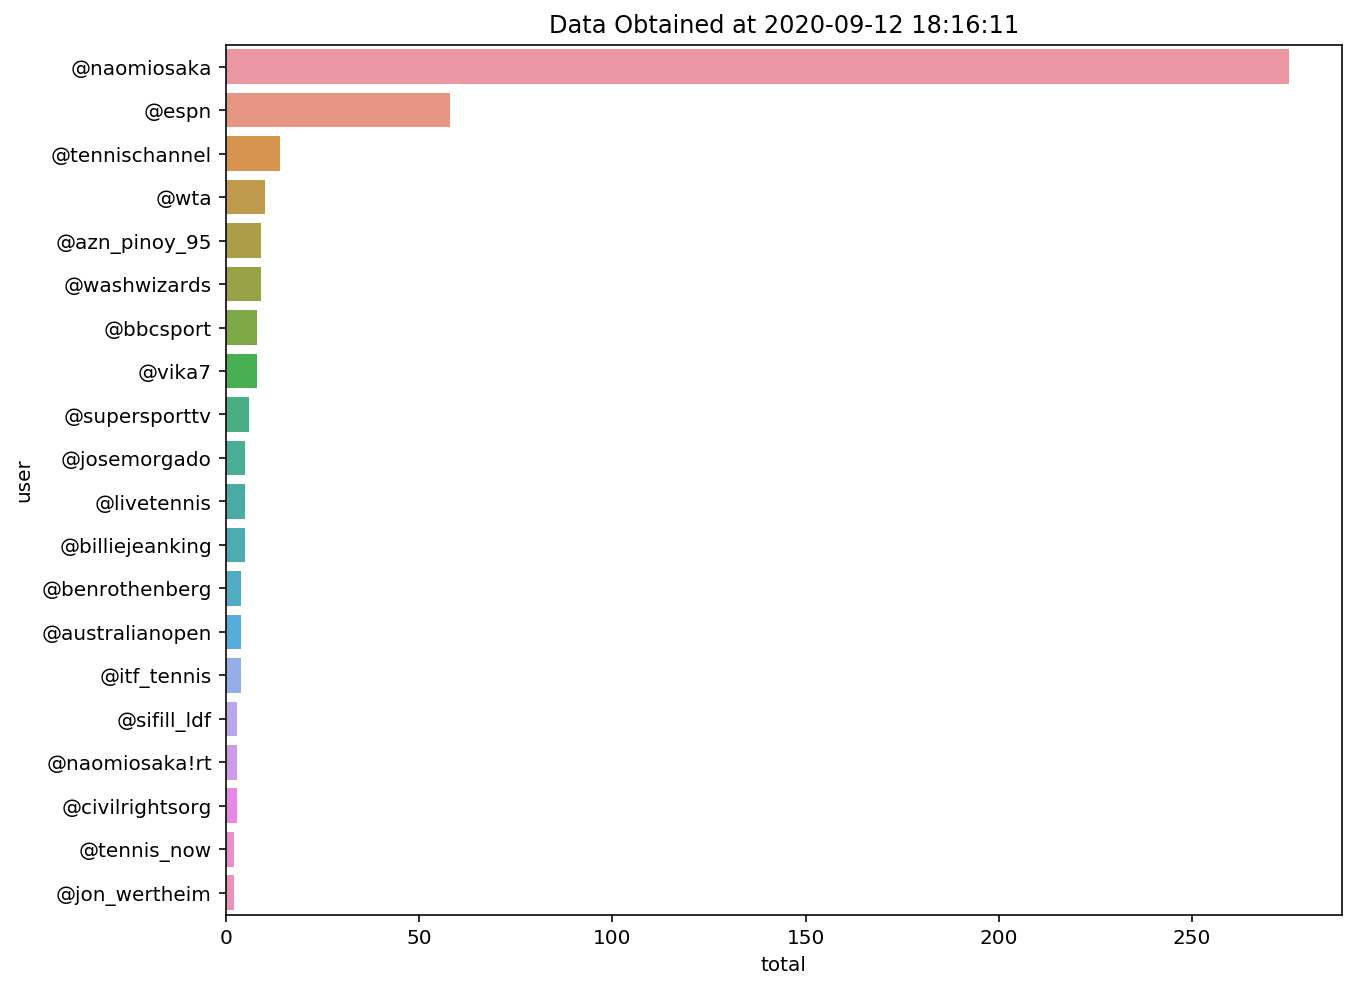

2020-09-12 18:16:20
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


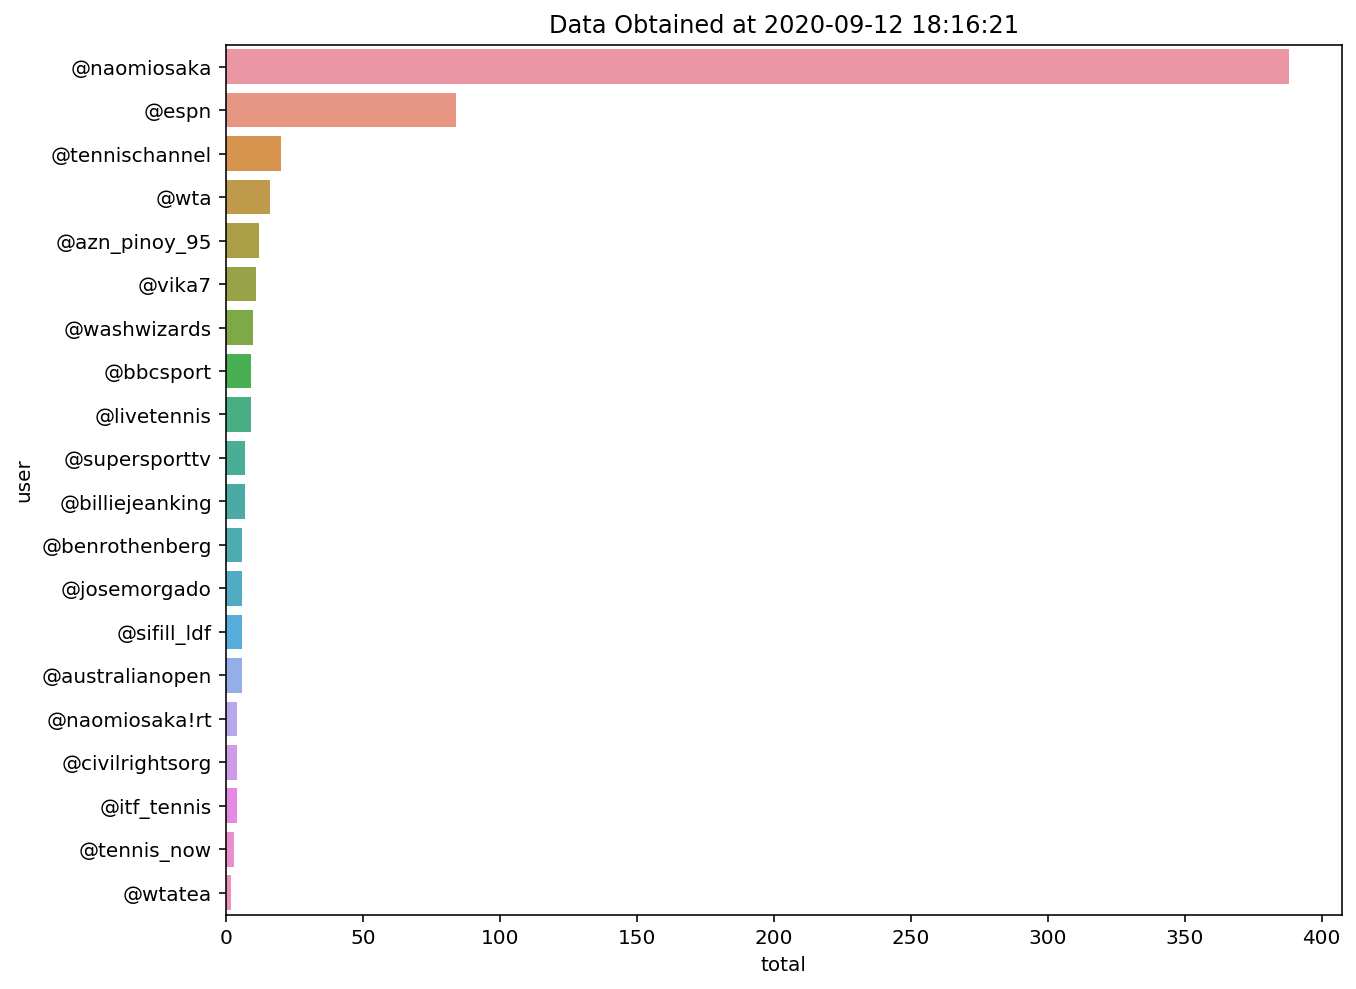

2020-09-12 18:16:30
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


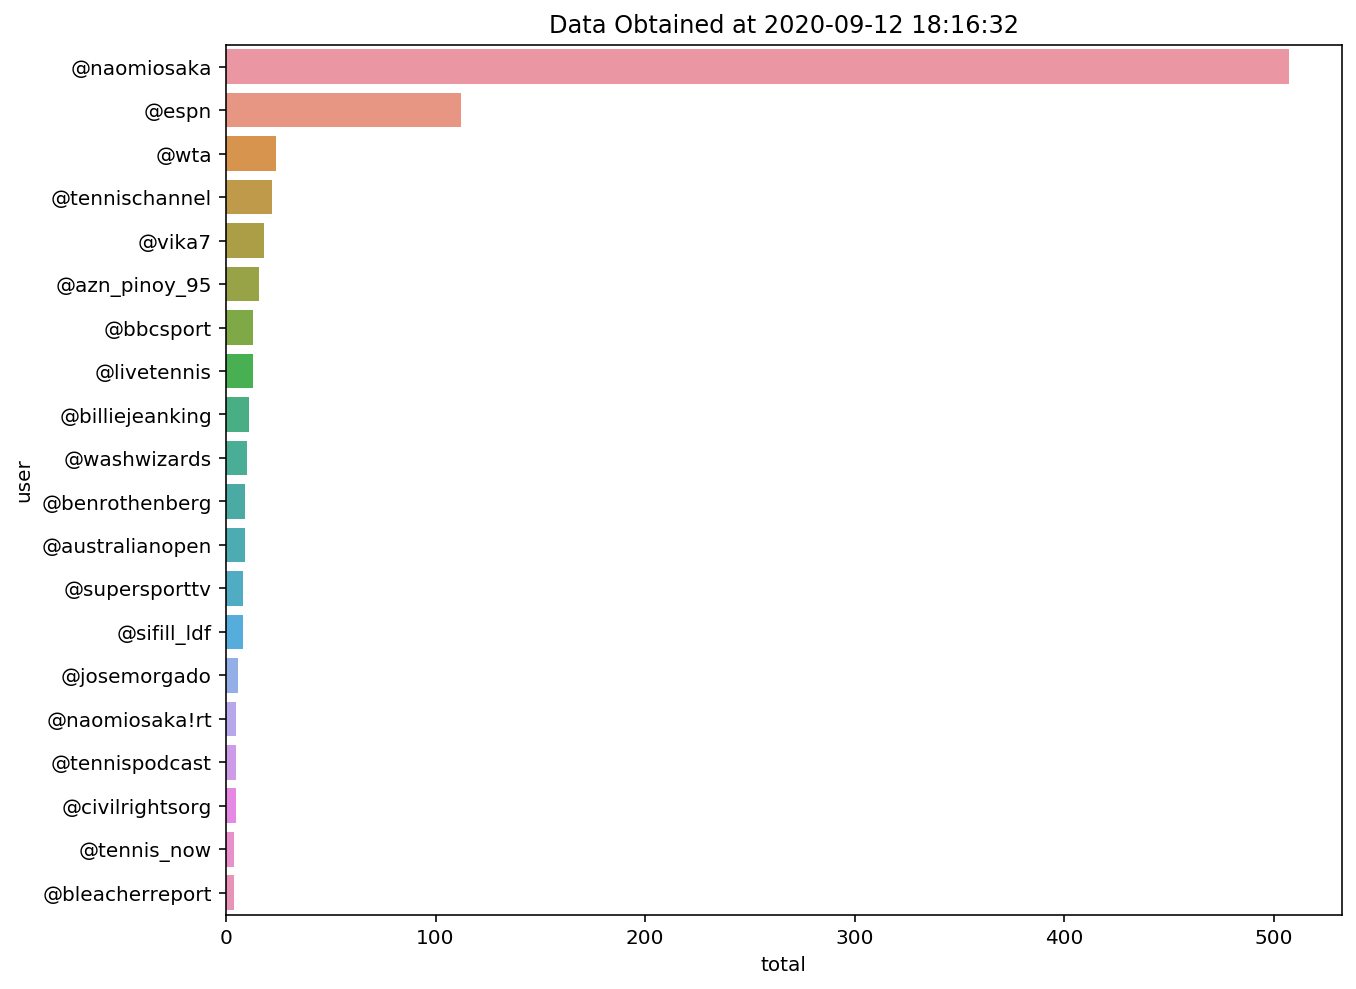

2020-09-12 18:16:40
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


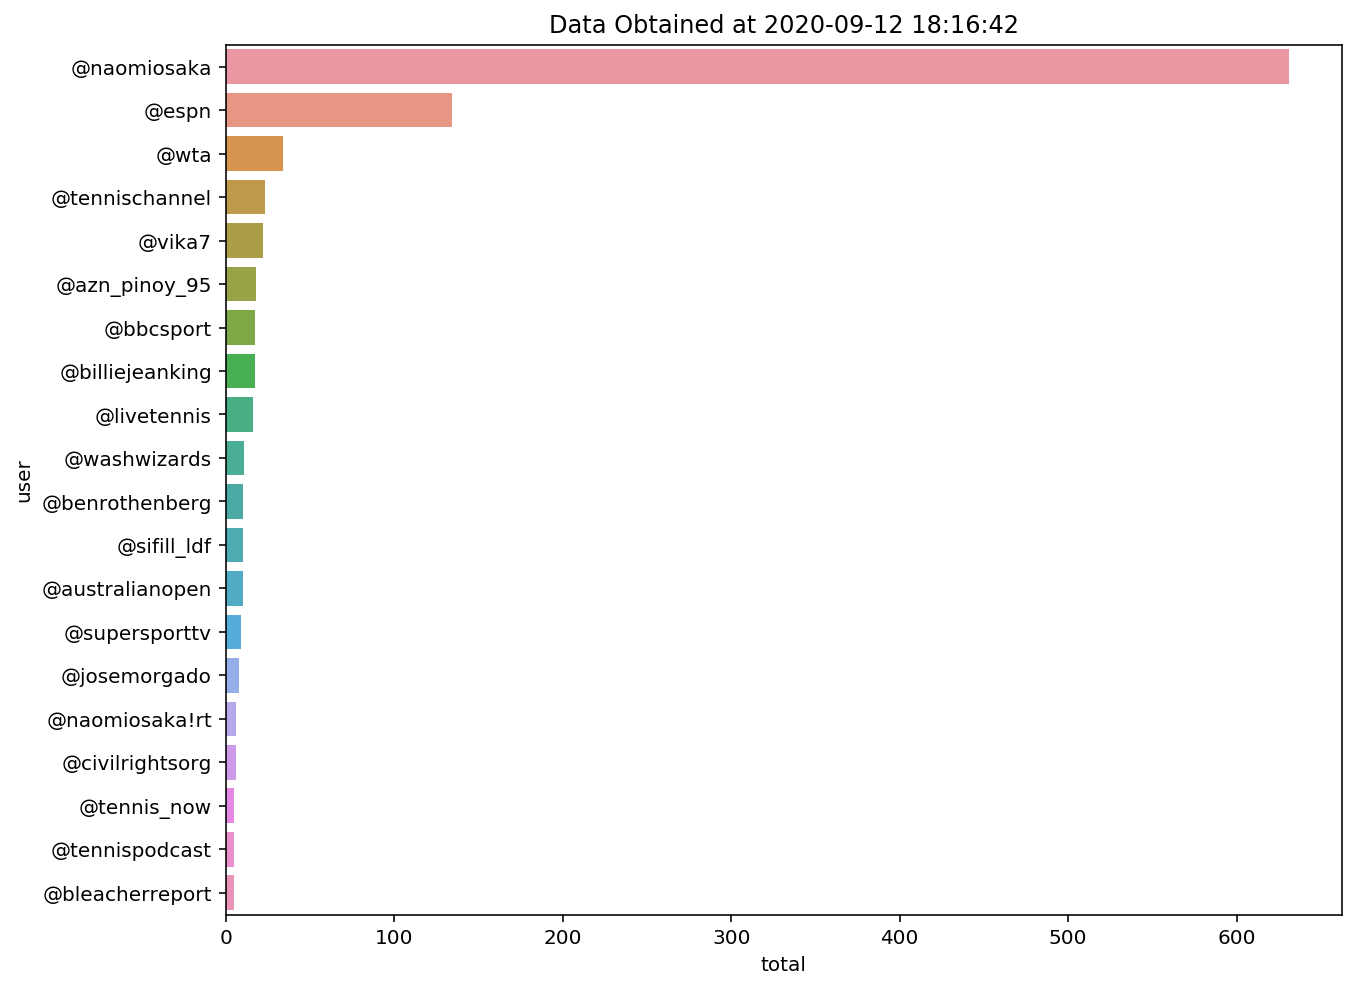

2020-09-12 18:16:50
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


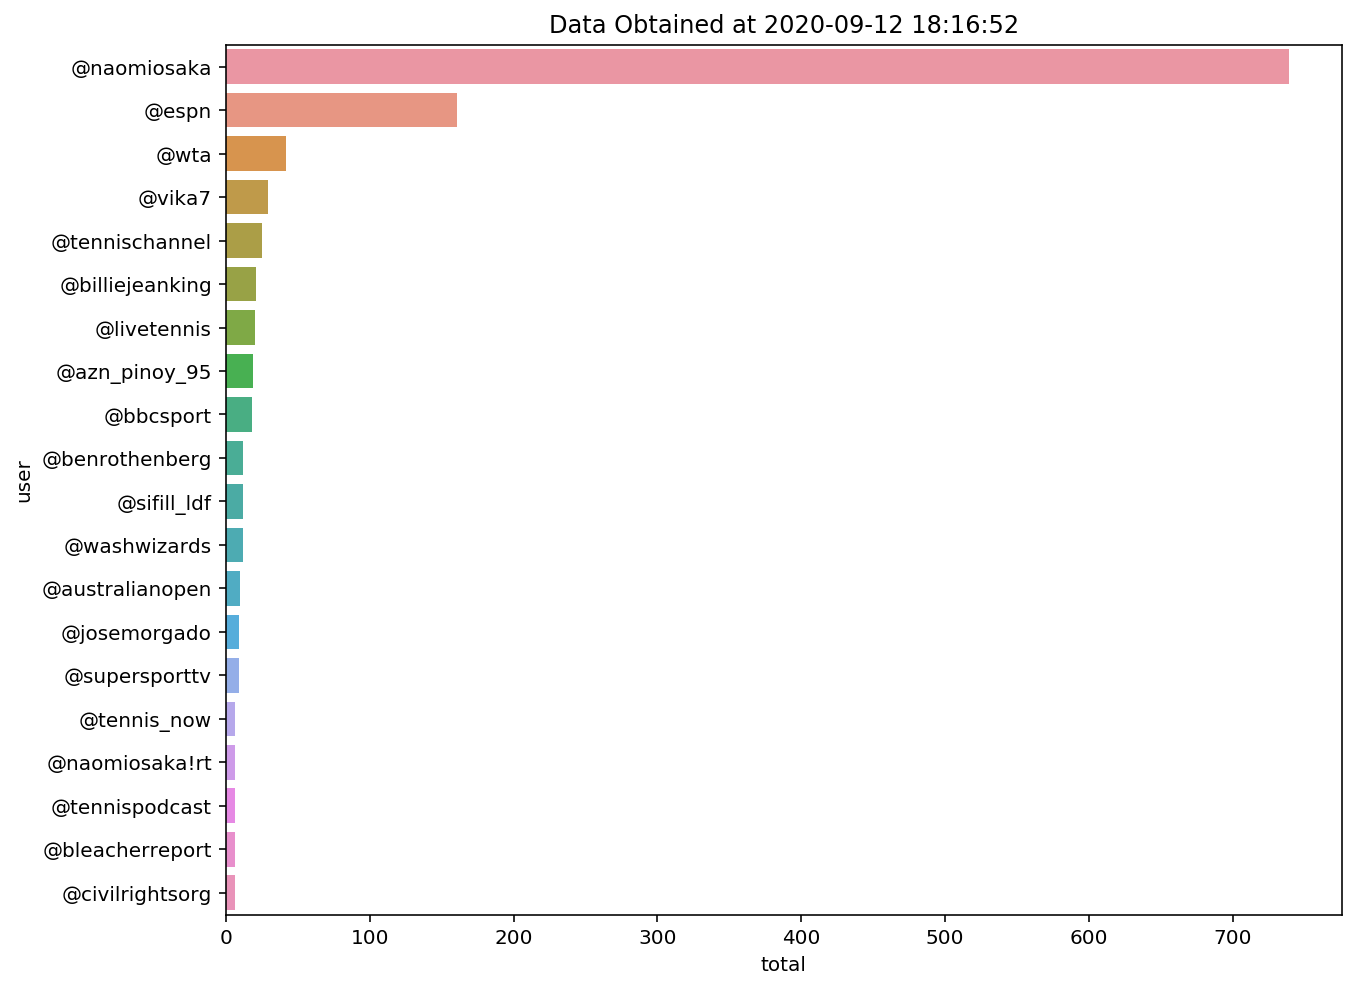

2020-09-12 18:17:00
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


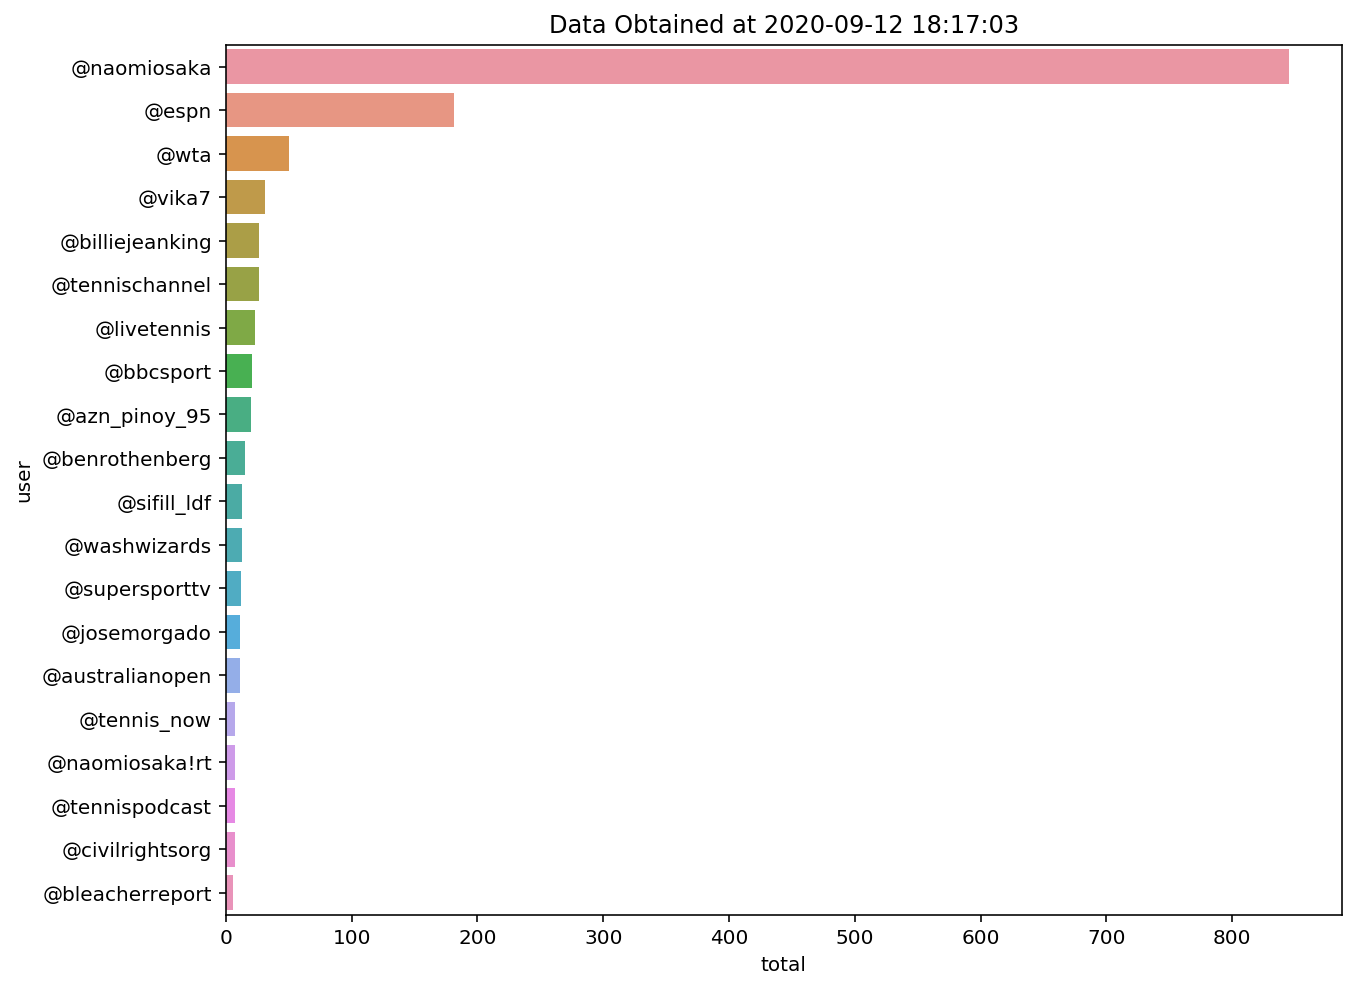

2020-09-12 18:17:10
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


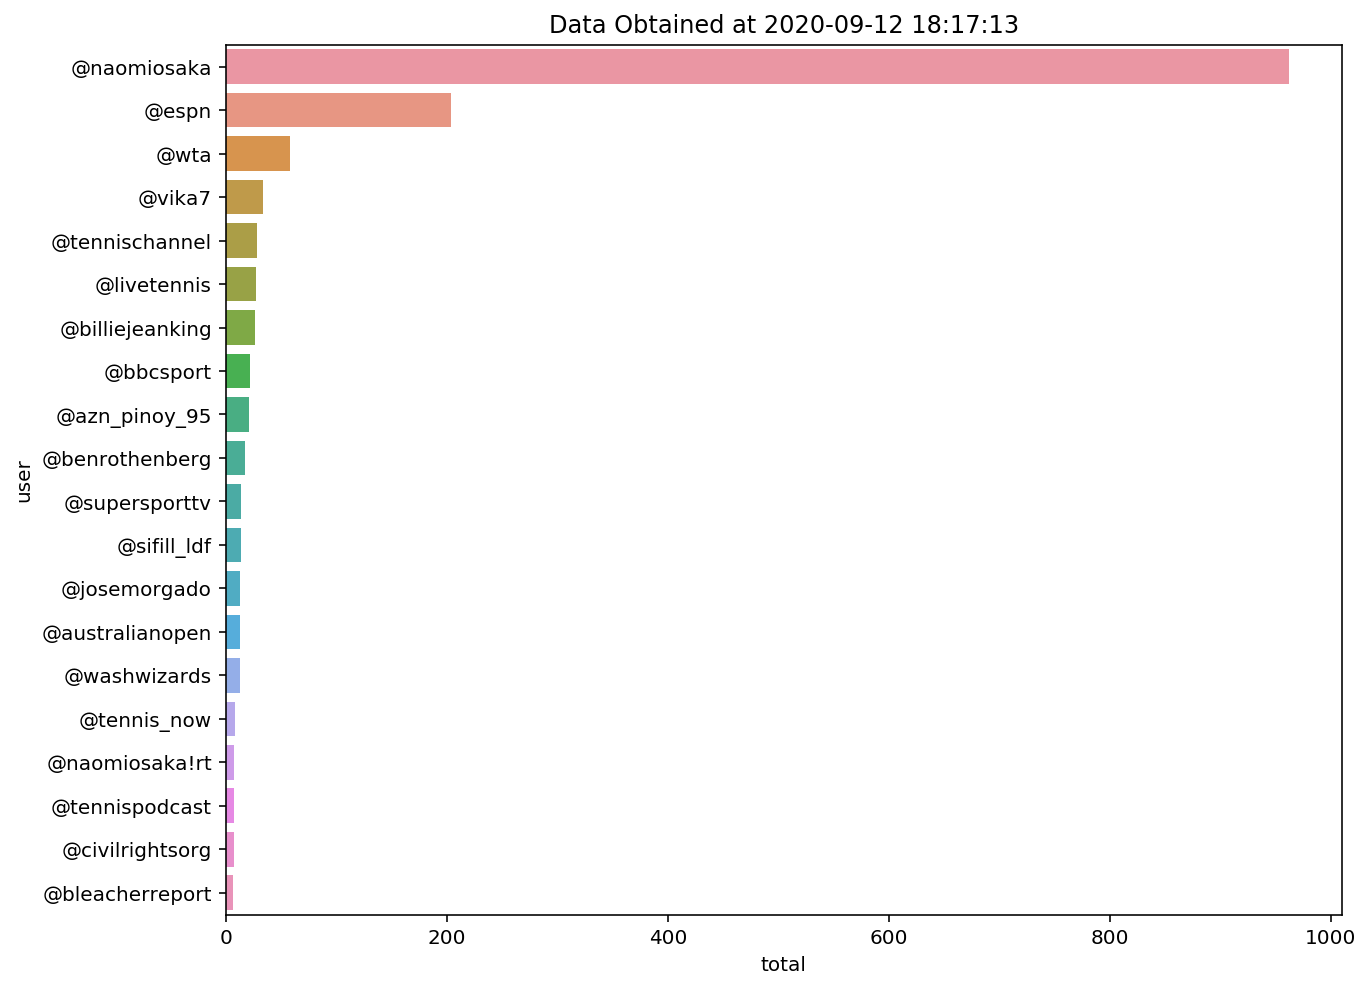

2020-09-12 18:17:20
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


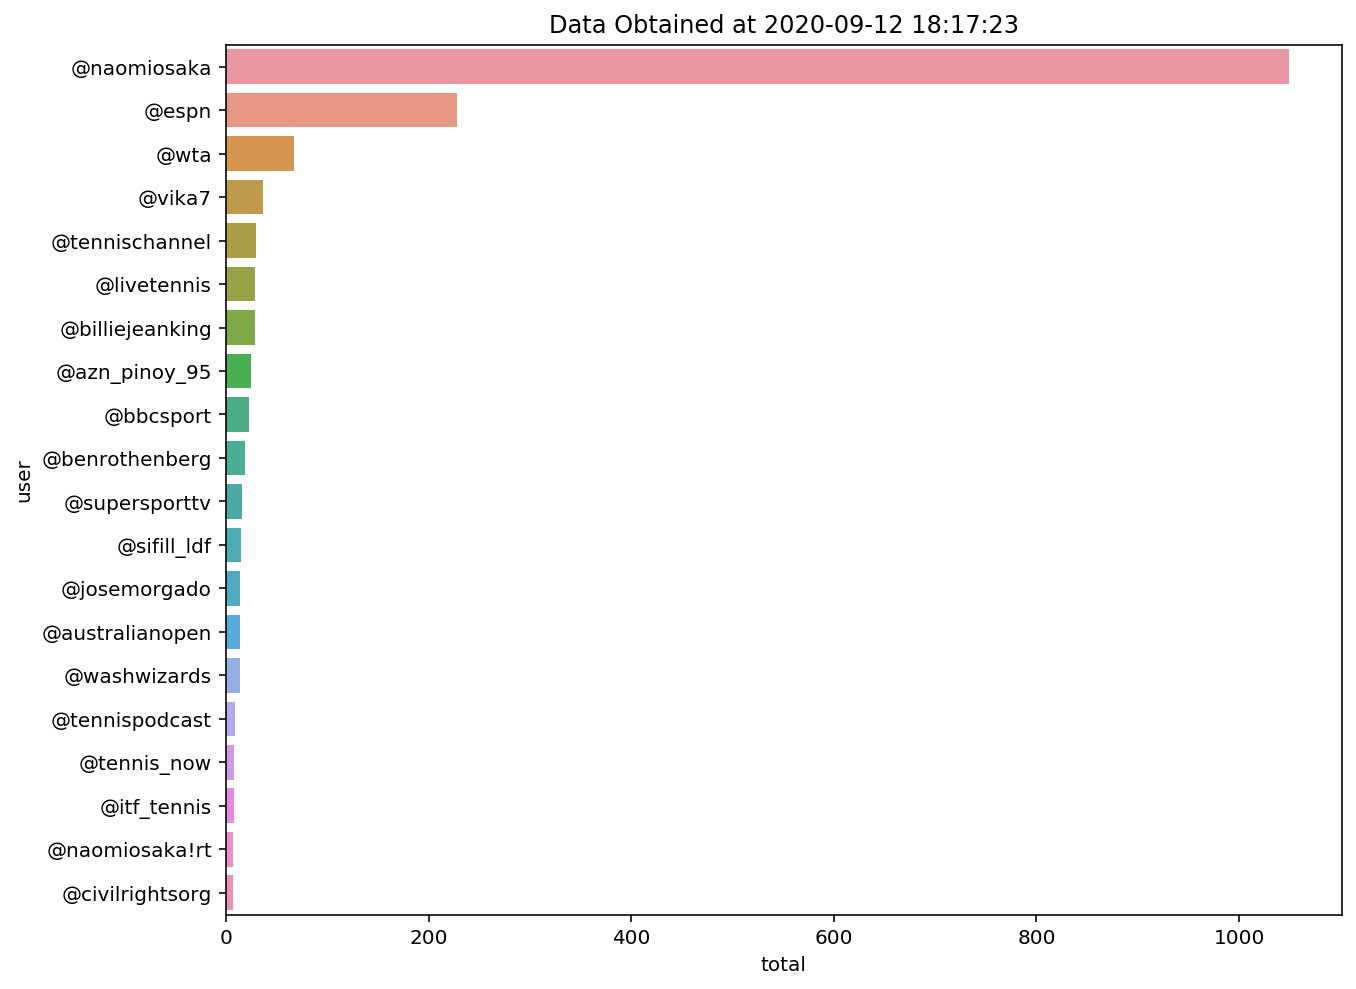

2020-09-12 18:17:30
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


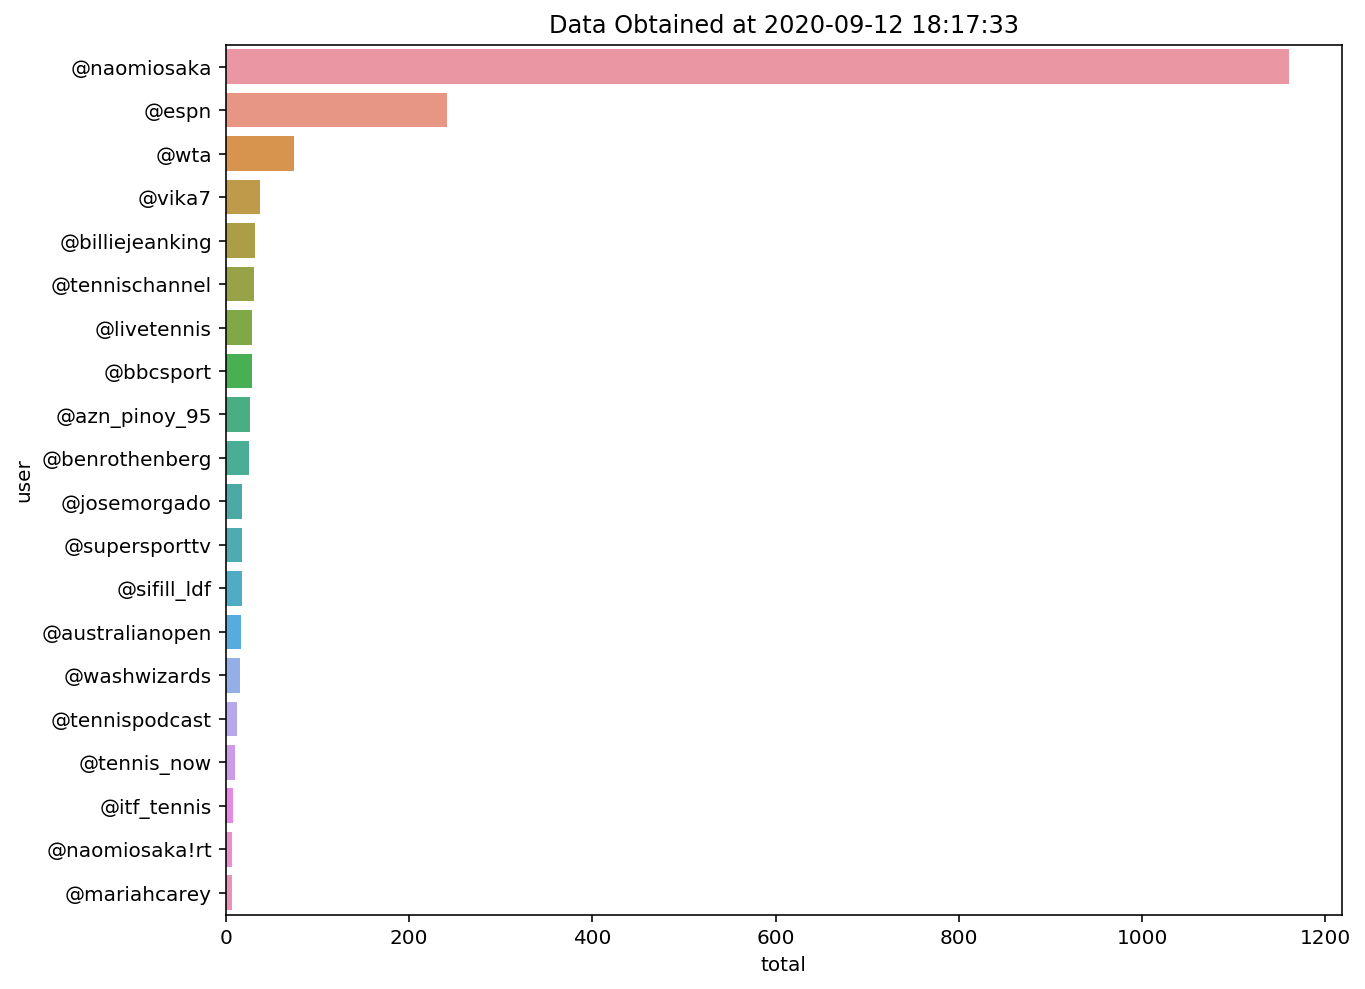

2020-09-12 18:17:40
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


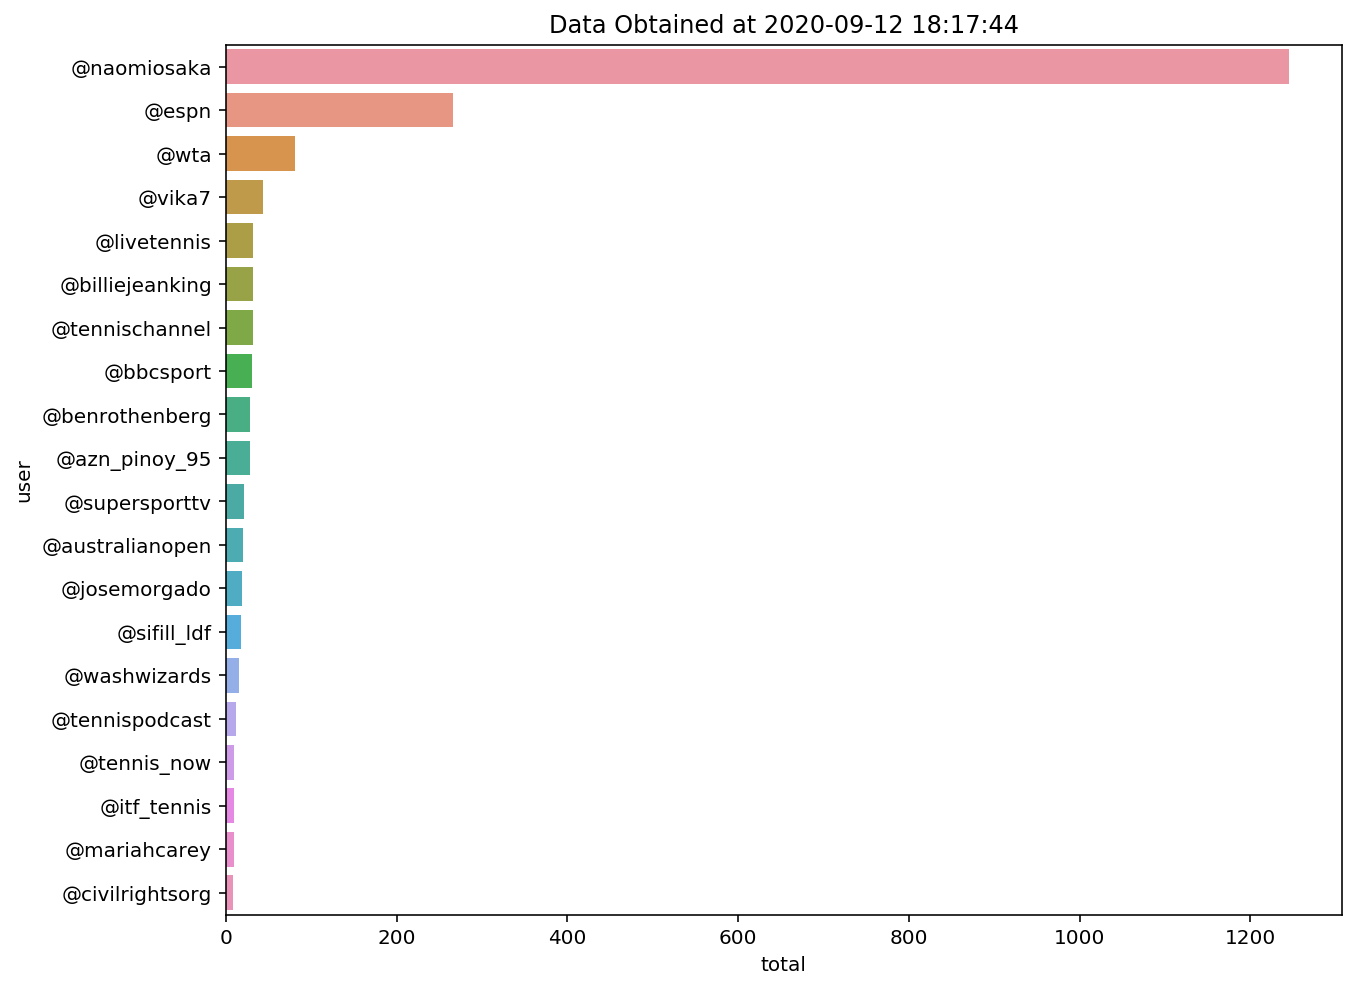

2020-09-12 18:17:50
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


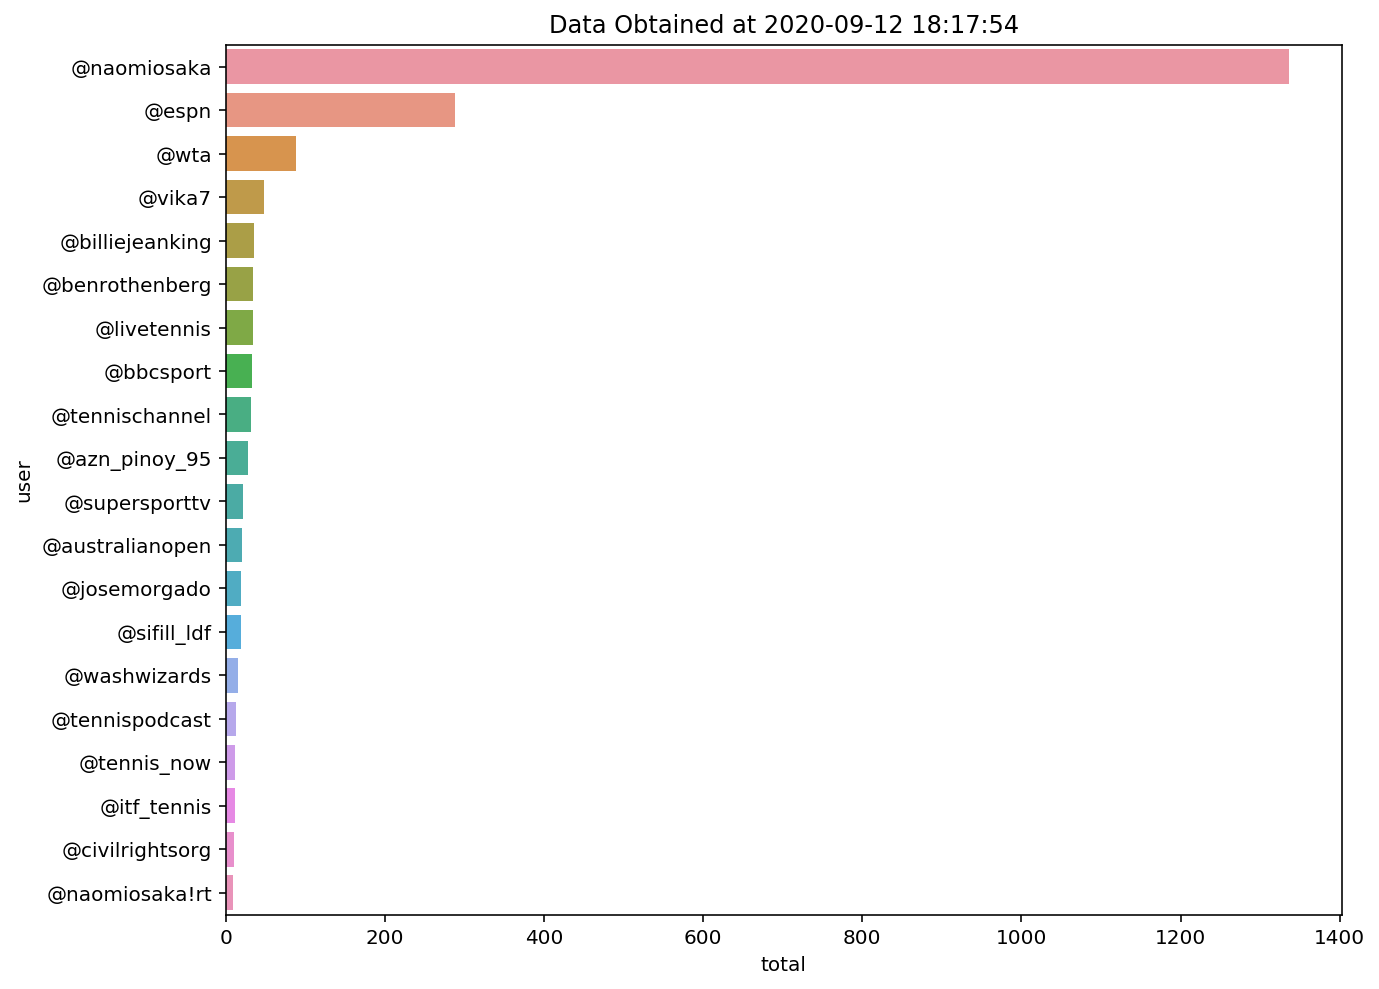

2020-09-12 18:18:00
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


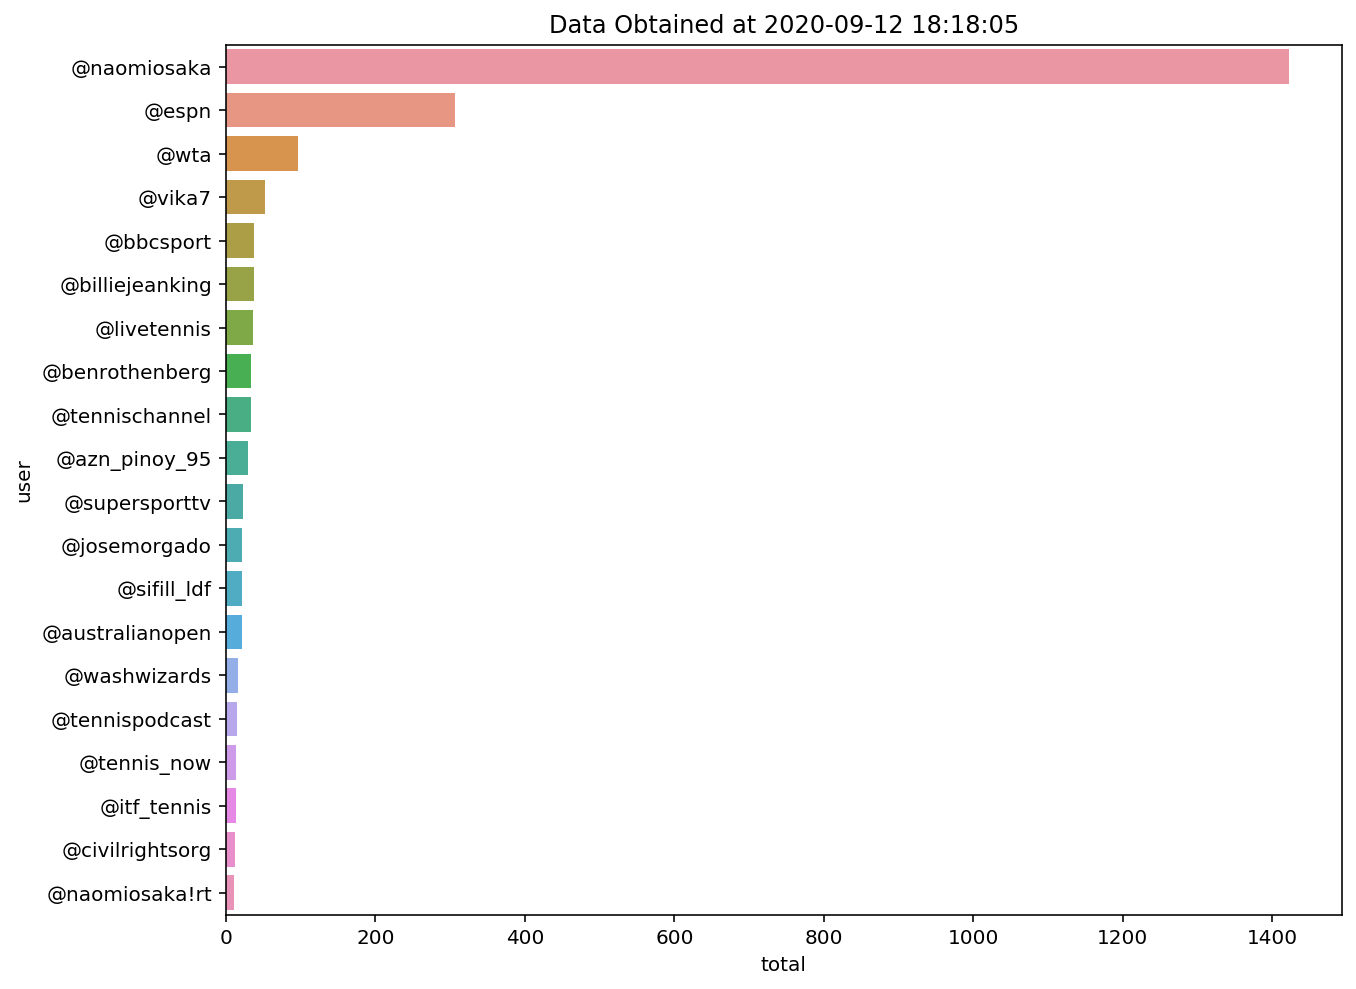

2020-09-12 18:18:10
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


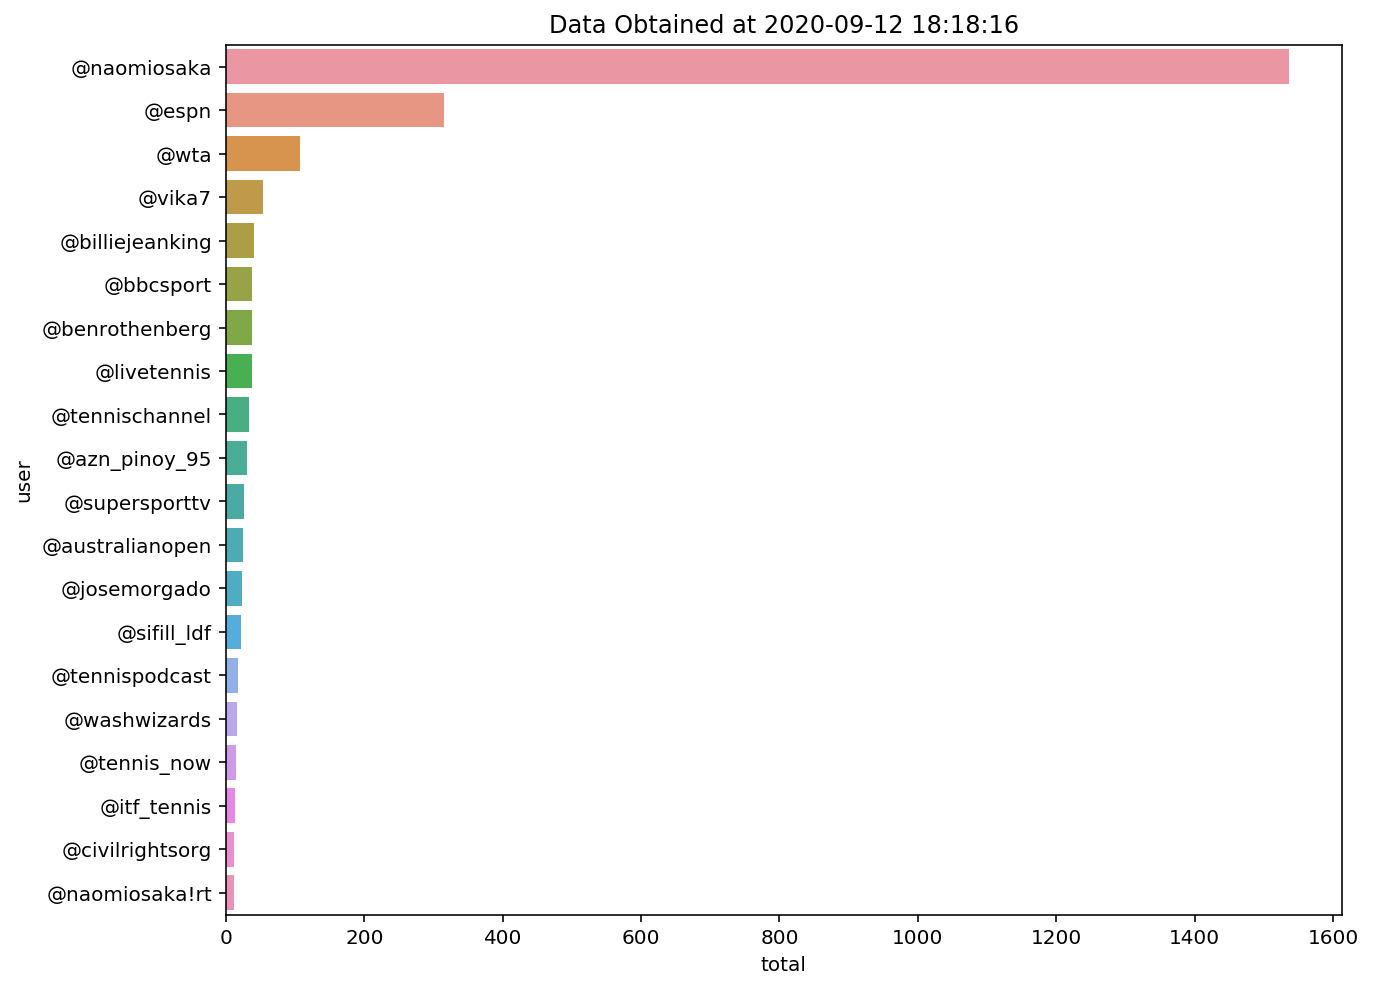

2020-09-12 18:18:20
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


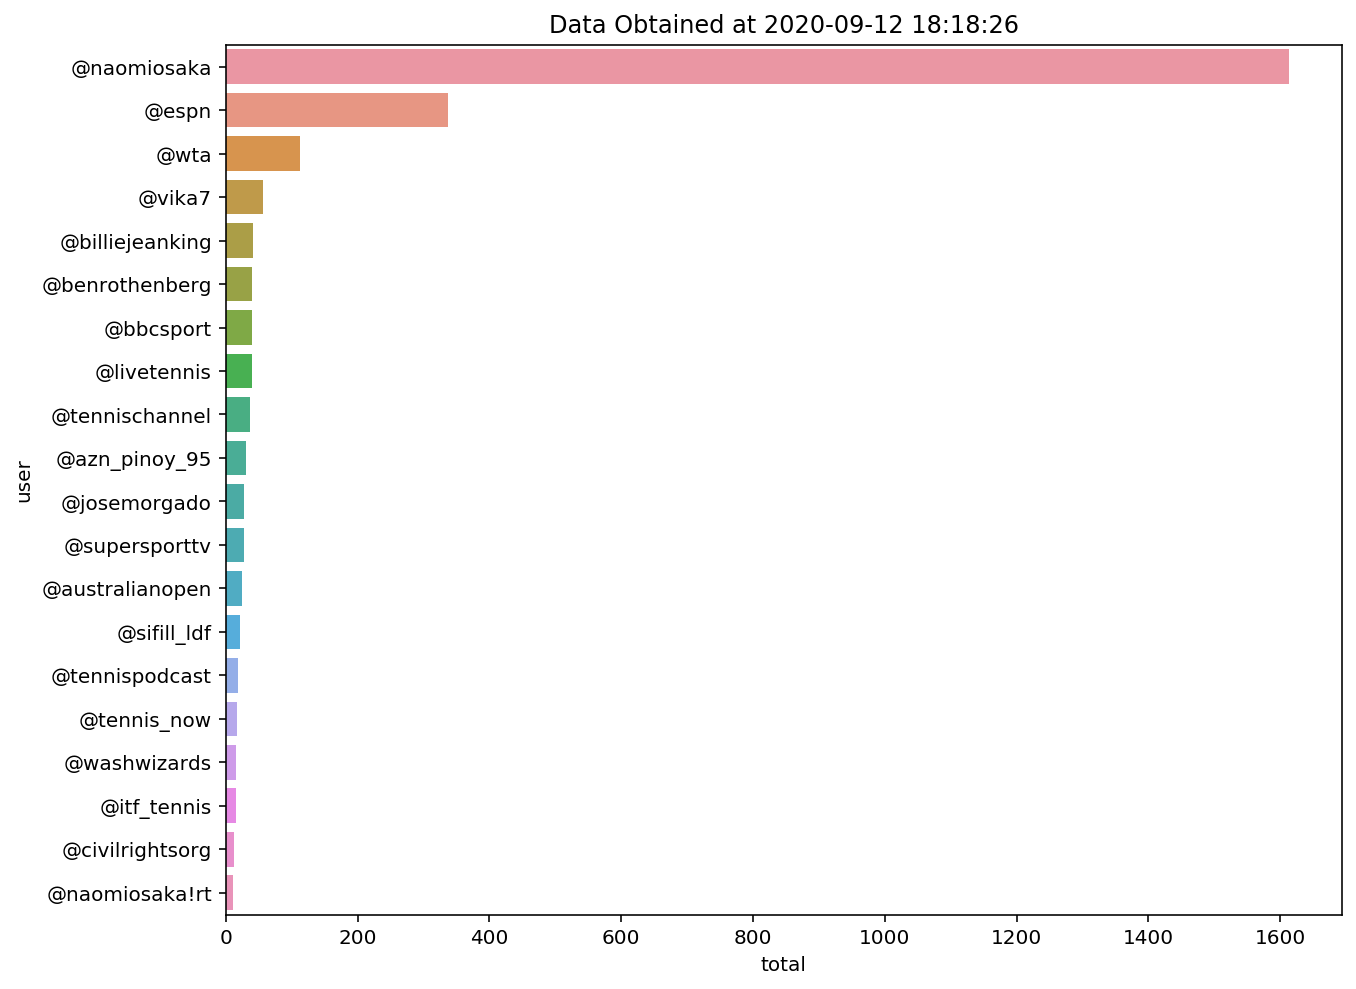

2020-09-12 18:18:30
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


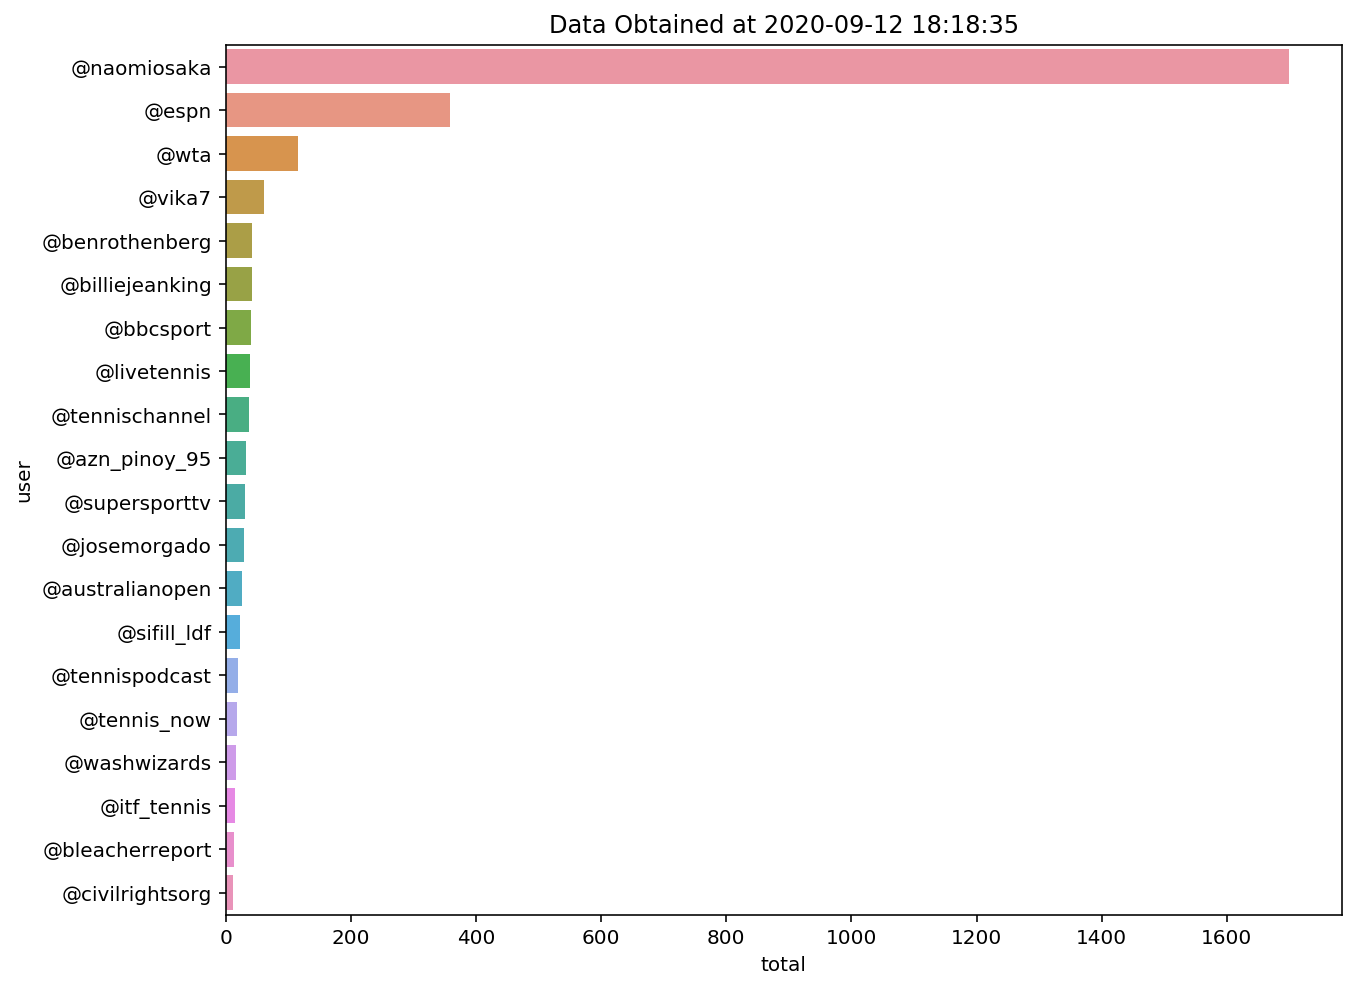

2020-09-12 18:18:40
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


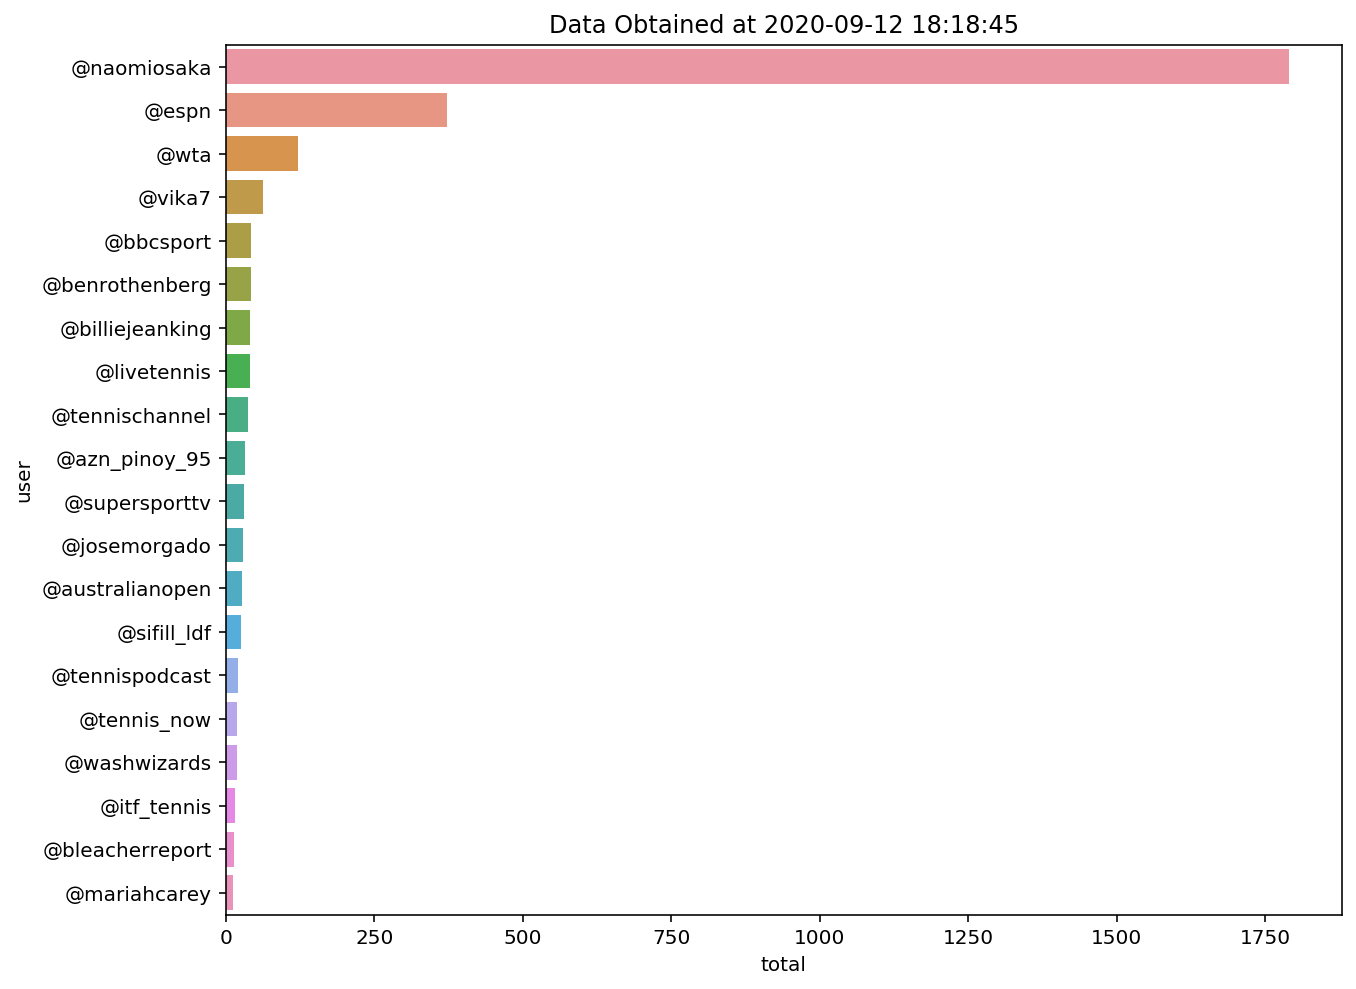

2020-09-12 18:18:50
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


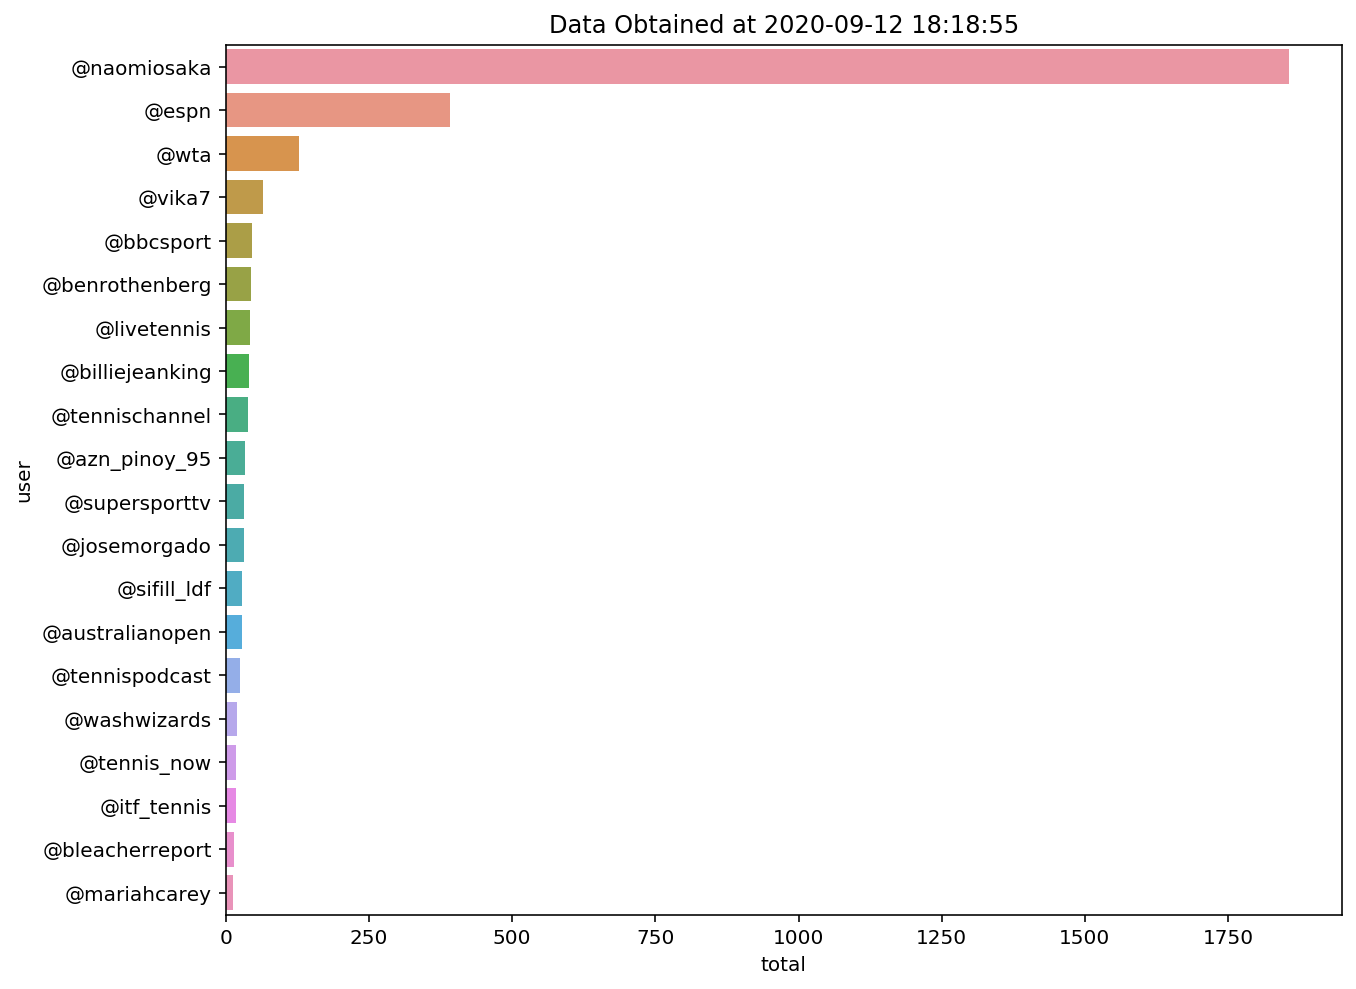

2020-09-12 18:19:00
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


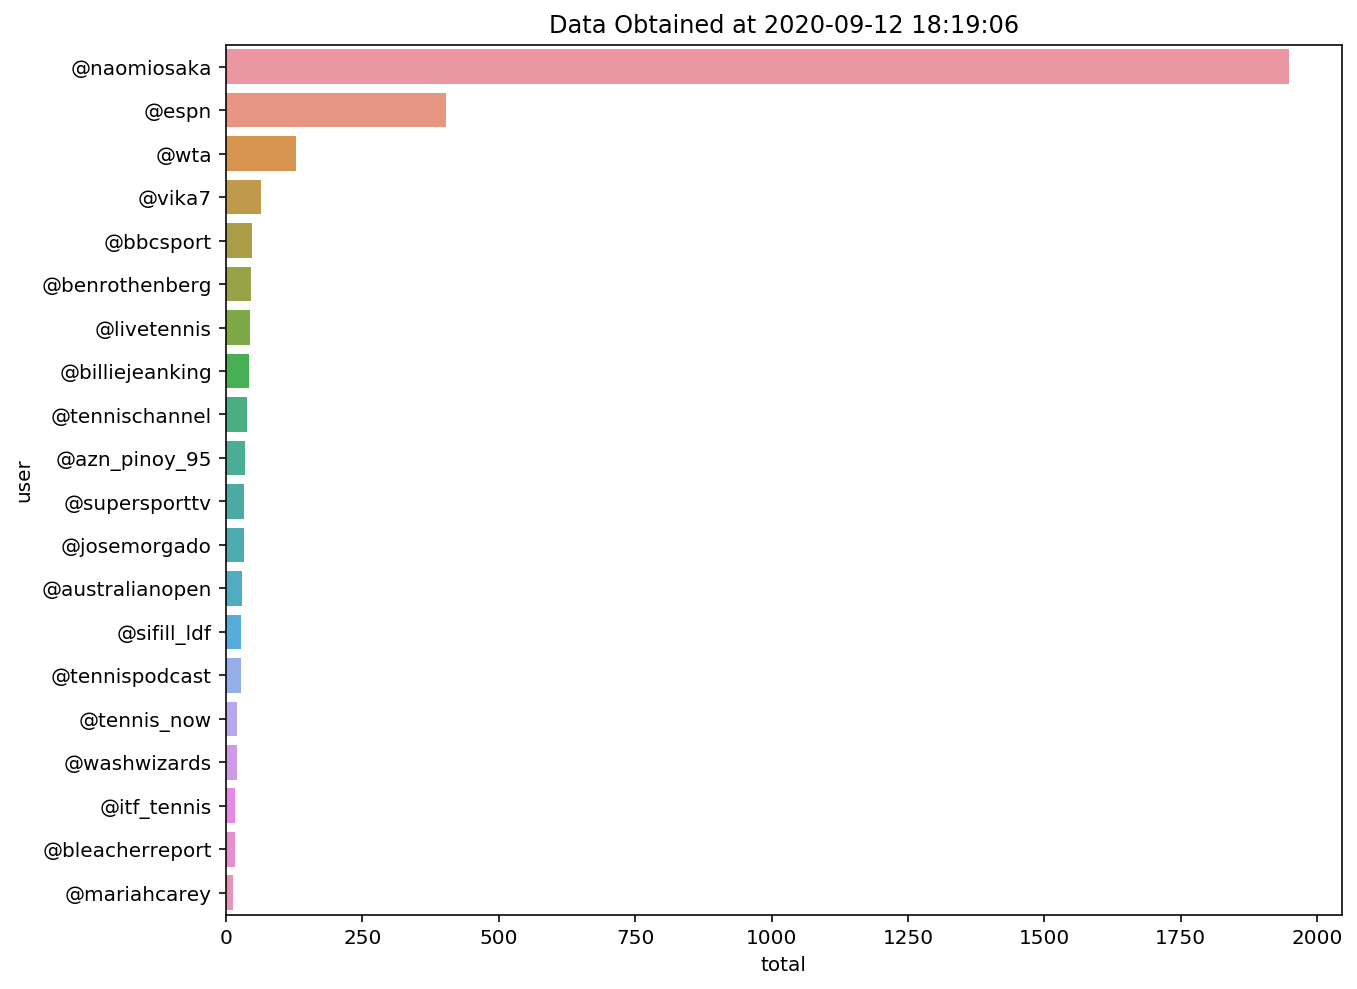

2020-09-12 18:19:10
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


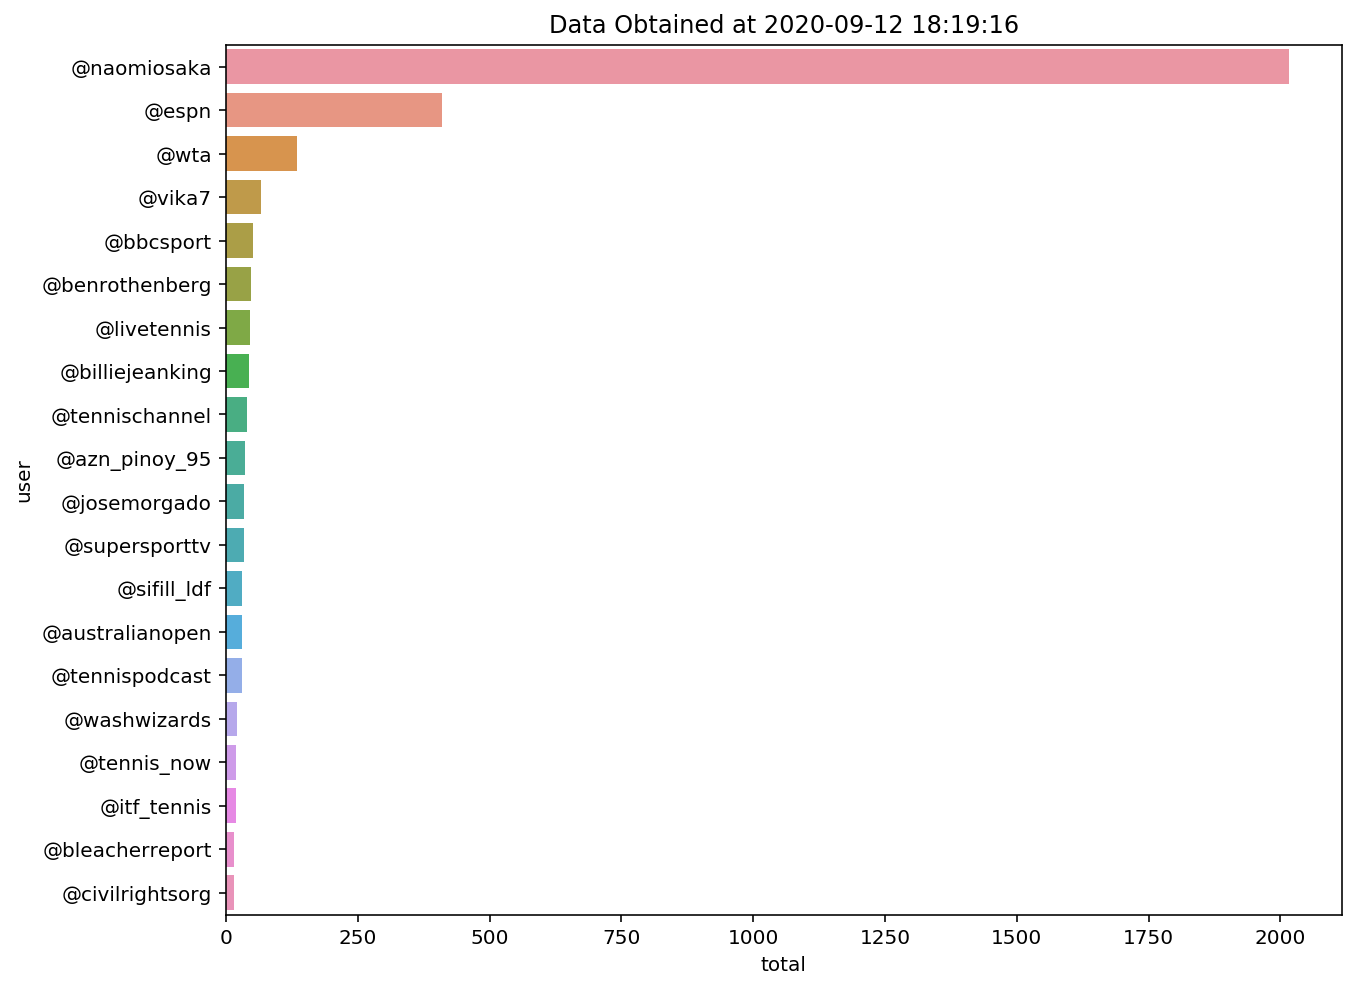

2020-09-12 18:19:20
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


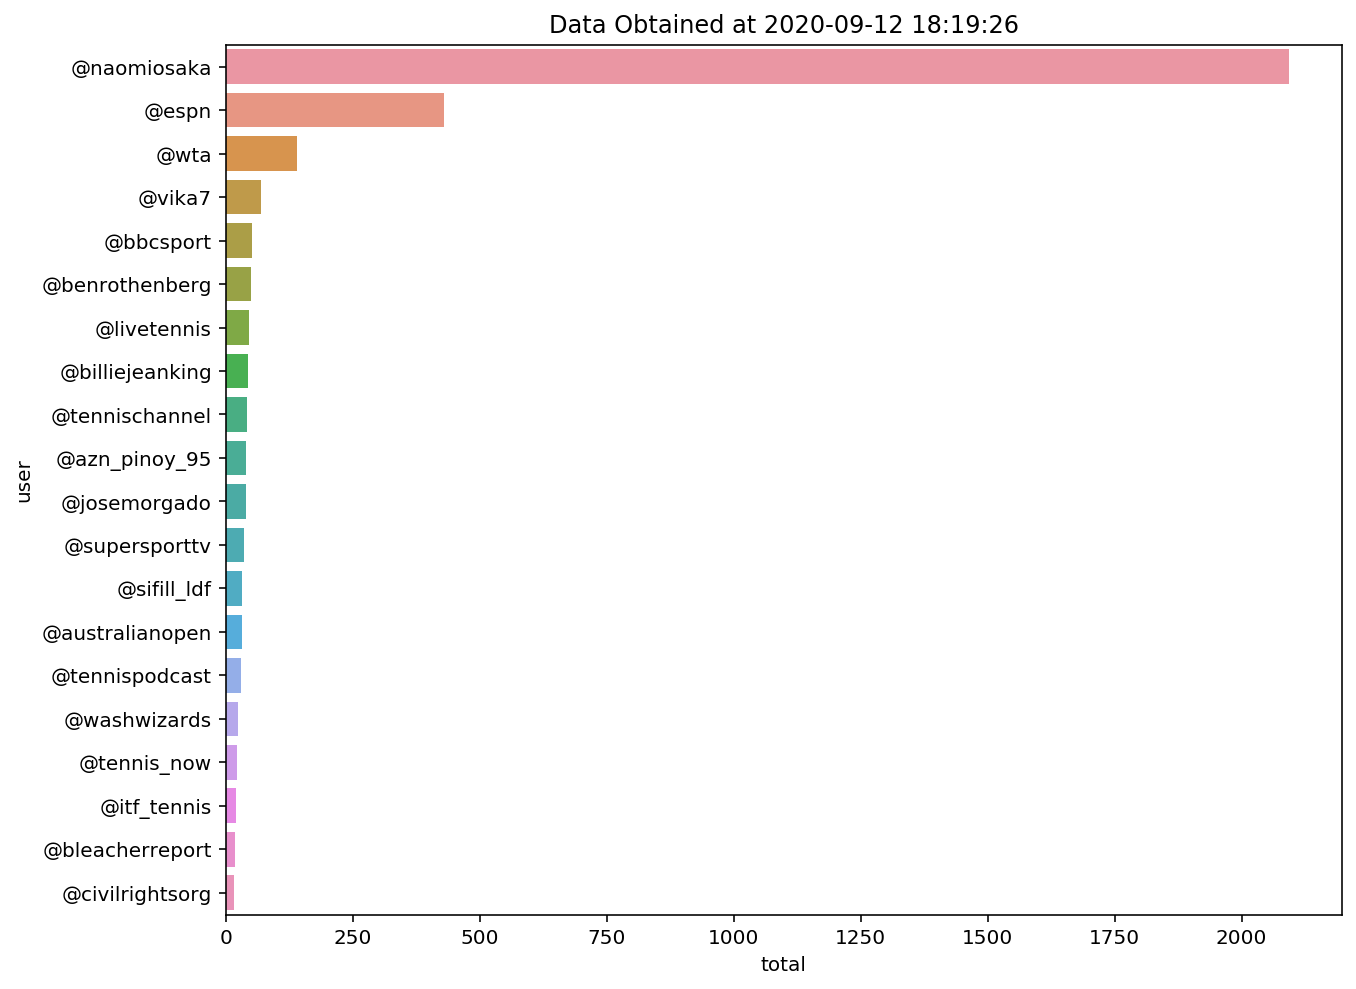

2020-09-12 18:19:30
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


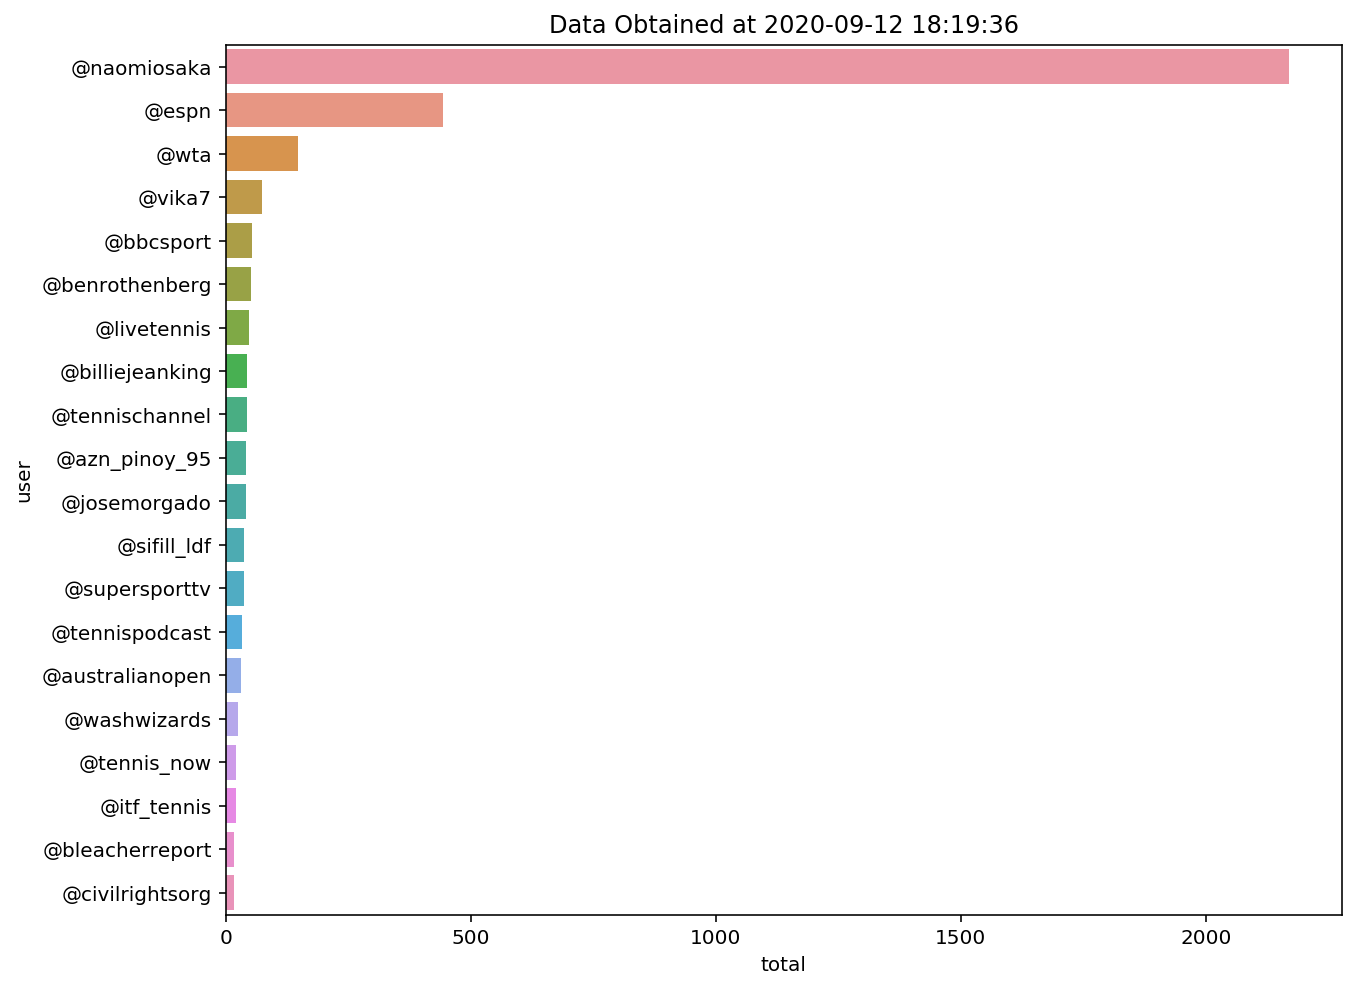

2020-09-12 18:19:40
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


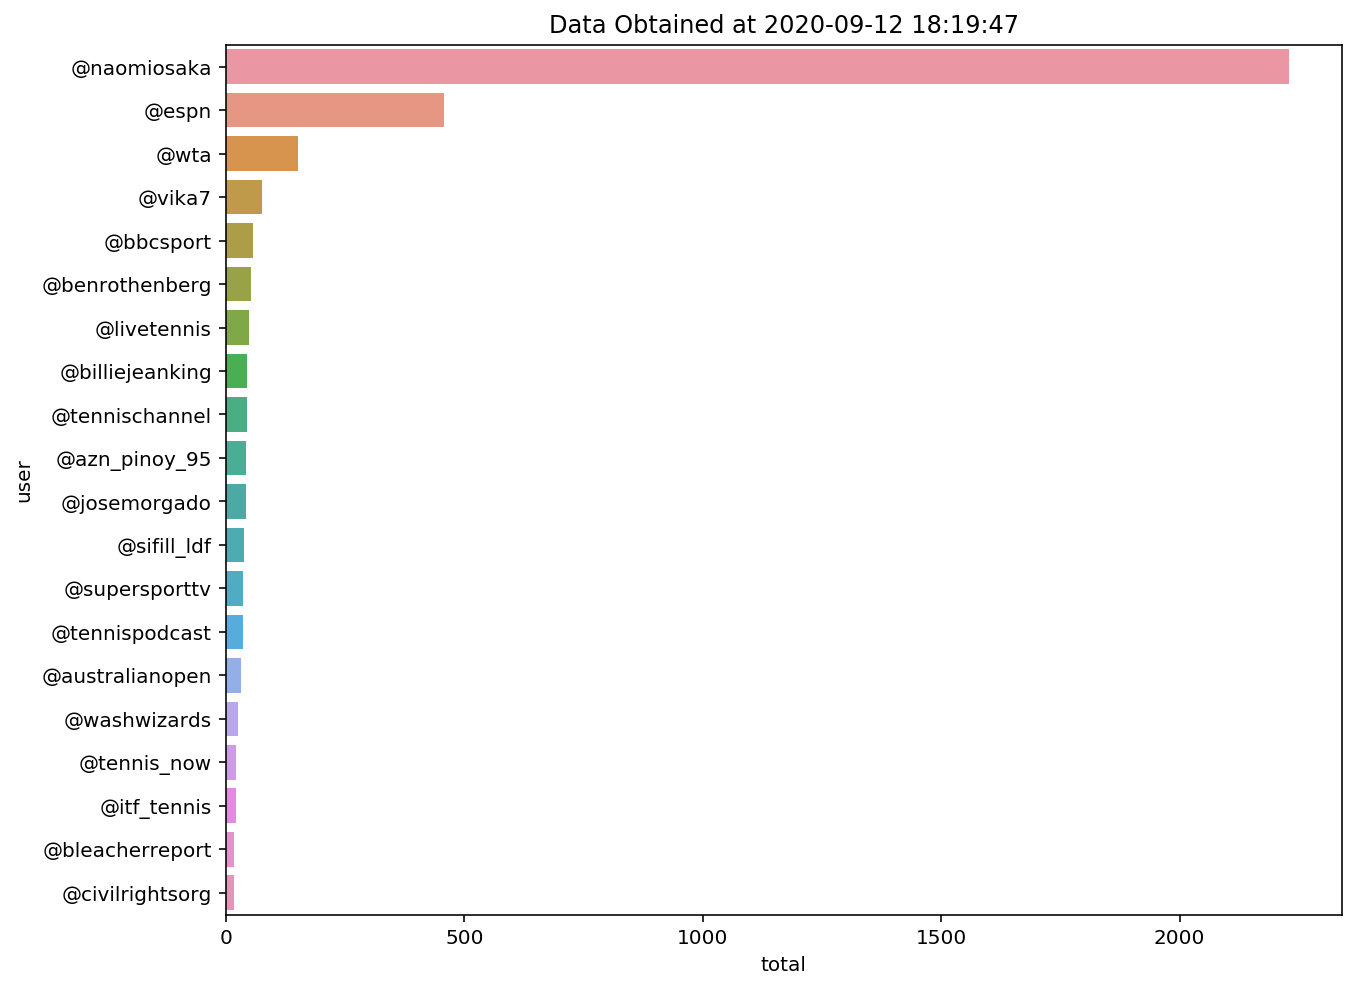

2020-09-12 18:19:50
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


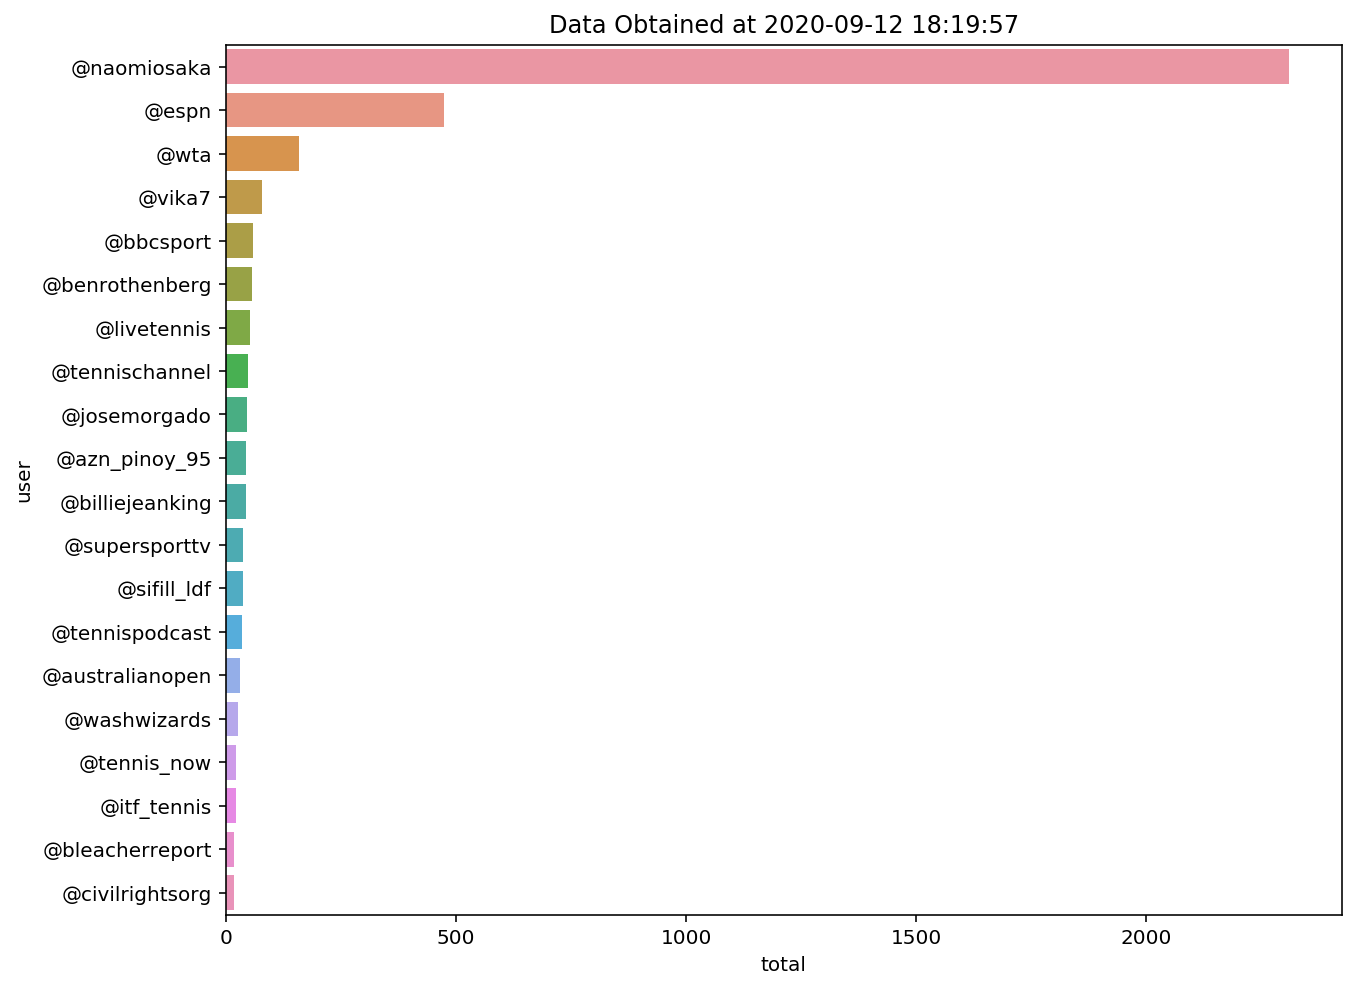

2020-09-12 18:20:00
Here 1
Here 2
Here 3
Here 4
Here 5
Here 6
Here 7


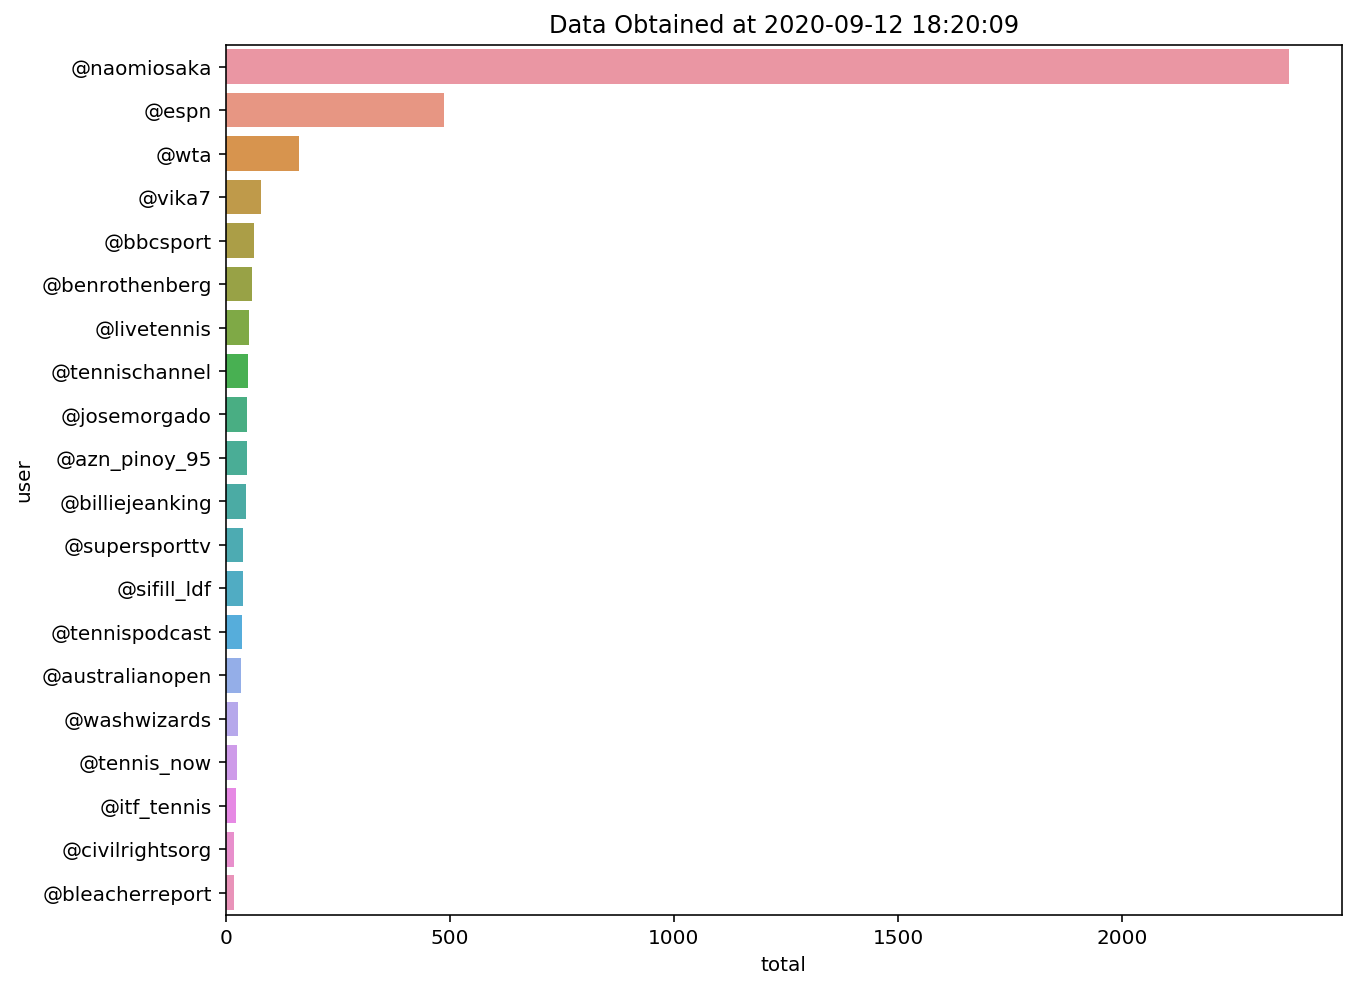

2020-09-12 18:20:11
Here 1
Here 2
Here 3


In [2]:
spark(TCP_IP,TCP_PORT,KEYWORD)